In [ ]:
import numpy as np
import pandas as pd
from keras.applications.mobilenet import MobileNet, preprocess_input
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout, Dense,BatchNormalization, Flatten, MaxPool2D
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau, Callback
from keras.layers import Conv2D, Reshape
from tensorflow.keras.utils import Sequence
from keras.backend import epsilon
import tensorflow as tf
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
# The ImageDataGenerator class has been moved to tensorflow.keras.preprocessing.image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2

from tqdm.notebook import tqdm_notebook as tqdm

import os

In [ ]:
!file "/content/archive (4).zip"


/content/archive (4).zip: Zip archive data, at least v4.5 to extract, compression method=deflate


In [ ]:
!unzip "/content/archive (4).zip" -d "/content/deepfake-detection"


Archive:  /content/archive (4).zip
  inflating: /content/deepfake-detection/fake/easy_100_1111.jpg  
  inflating: /content/deepfake-detection/fake/easy_101_0010.jpg  
  inflating: /content/deepfake-detection/fake/easy_102_0101.jpg  
  inflating: /content/deepfake-detection/fake/easy_103_1111.jpg  
  inflating: /content/deepfake-detection/fake/easy_104_1000.jpg  
  inflating: /content/deepfake-detection/fake/easy_105_1100.jpg  
  inflating: /content/deepfake-detection/fake/easy_106_0011.jpg  
  inflating: /content/deepfake-detection/fake/easy_107_1011.jpg  
  inflating: /content/deepfake-detection/fake/easy_108_1111.jpg  
  inflating: /content/deepfake-detection/fake/easy_109_1111.jpg  
  inflating: /content/deepfake-detection/fake/easy_10_0001.jpg  
  inflating: /content/deepfake-detection/fake/easy_110_0001.jpg  
  inflating: /content/deepfake-detection/fake/easy_111_1101.jpg  
  inflating: /content/deepfake-detection/fake/easy_112_1001.jpg  
  inflating: /content/deepfake-detection/f

In [ ]:
print(os.listdir("/content/deepfake-detection"))

['fake', 'real']


In [ ]:
real = "/content/deepfake-detection/real"
fake = "/content/deepfake-detection/fake"

real_path = os.listdir(real)
fake_path = os.listdir(fake)

In [ ]:
def load_img(path):
    image = cv2.imread(path)
    image = cv2.resize(image,(224, 224))
    return image[...,::-1]

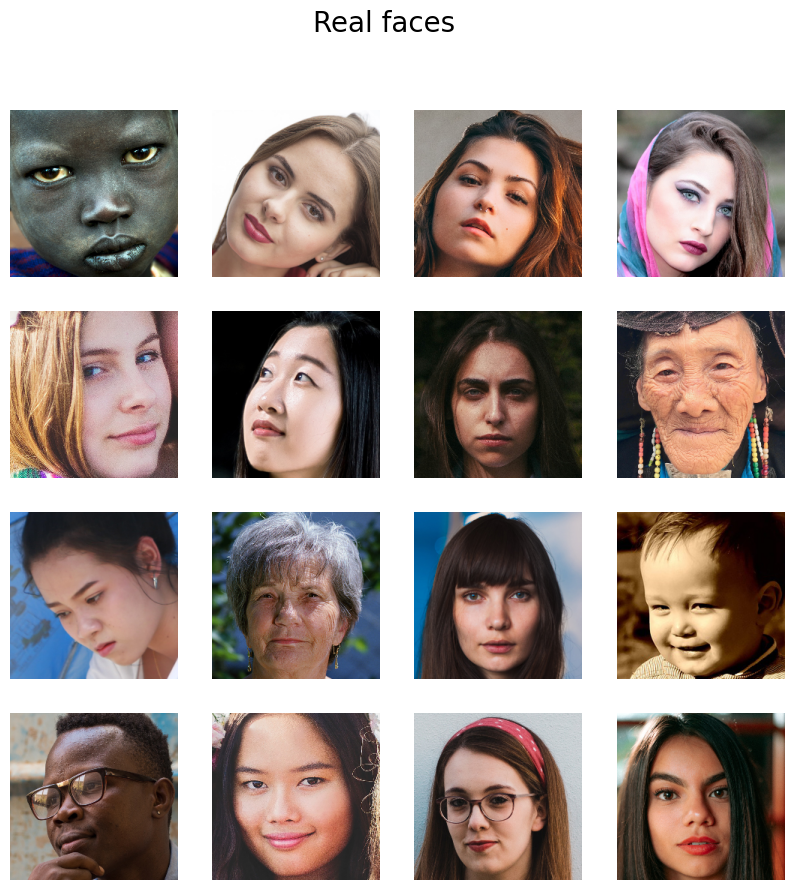

In [ ]:
fig = plt.figure(figsize=(10, 10))

for i in range(16):
    # Use os.path.join to create the correct file path
    image_path = os.path.join(real, real_path[i])
    plt.subplot(4, 4, i+1)
    plt.imshow(load_img(image_path), cmap='gray')
    plt.suptitle("Real faces",fontsize=20)
    plt.axis('off')

plt.show()

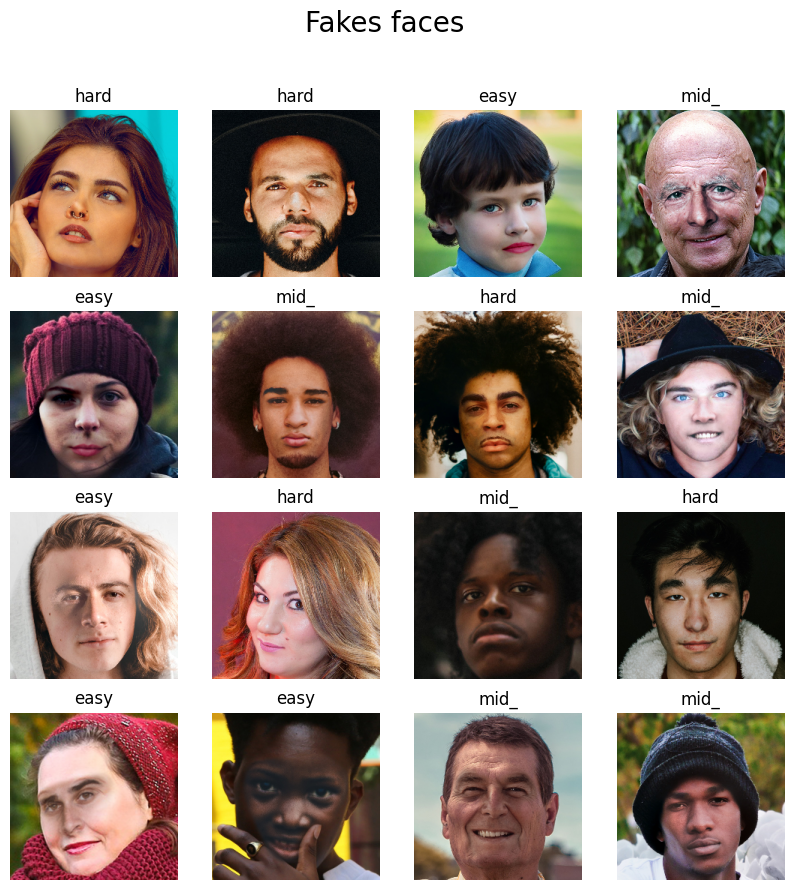

In [ ]:
fig = plt.figure(figsize=(10,10))

for i in range(16):
    plt.subplot(4, 4, i+1)
    image_path = os.path.join(fake, fake_path[i])
    plt.imshow(load_img(image_path), cmap='gray')
    plt.suptitle("Fakes faces",fontsize=20)
    plt.title(fake_path[i][:4])
    plt.axis('off')

plt.show()

In [ ]:
dataset_path = "/content/deepfake-detection"

Found 2041 images belonging to 2 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
Generator Loss: 2.0791, Discriminator Loss: 0.7463
Epoch 2/100
Generator Loss: 0.7415, Discriminator Loss: 0.8524
Epoch 3/100
Generator Loss: 1.0536, Discriminator Loss: 1.5551
Epoch 4/100
Generator Loss: 0.7755, Discriminator Loss: 1.5196
Epoch 5/100
Generator Loss: 0.7880, Discriminator Loss: 1.4989
Epoch 6/100
Generator Loss: 0.7703, Discriminator Loss: 1.4163
Epoch 7/100
Generator Loss: 0.8098, Discriminator Loss: 1.3500
Epoch 8/100
Generator Loss: 0.7758, Discriminator Loss: 1.3351
Epoch 9/100
Generator Loss: 0.7818, Discriminator Loss: 1.4814
Epoch 10/100
Generator Loss: 0.8658, Discriminator Loss: 1.4120


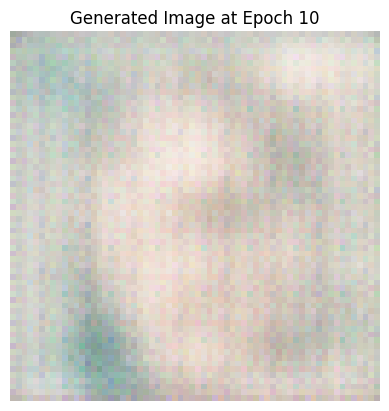

Epoch 11/100
Generator Loss: 0.7138, Discriminator Loss: 1.4213
Epoch 12/100
Generator Loss: 0.7893, Discriminator Loss: 1.3617
Epoch 13/100
Generator Loss: 0.6810, Discriminator Loss: 1.4040
Epoch 14/100
Generator Loss: 0.6083, Discriminator Loss: 1.5112
Epoch 15/100
Generator Loss: 0.6773, Discriminator Loss: 1.4346
Epoch 16/100
Generator Loss: 0.6485, Discriminator Loss: 1.4175
Epoch 17/100
Generator Loss: 0.6609, Discriminator Loss: 1.4654
Epoch 18/100
Generator Loss: 0.6821, Discriminator Loss: 1.4122
Epoch 19/100
Generator Loss: 0.6447, Discriminator Loss: 1.4209
Epoch 20/100
Generator Loss: 0.7027, Discriminator Loss: 1.3955


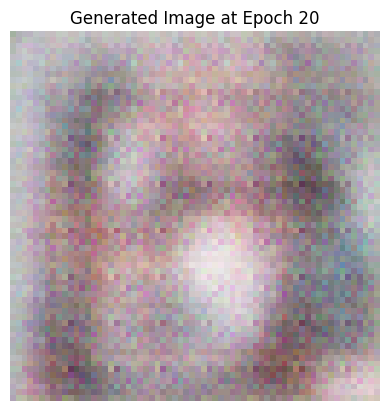

Epoch 21/100
Generator Loss: 0.6822, Discriminator Loss: 1.3364
Epoch 22/100
Generator Loss: 0.7269, Discriminator Loss: 1.3227
Epoch 23/100
Generator Loss: 0.6894, Discriminator Loss: 1.3734
Epoch 24/100
Generator Loss: 0.6797, Discriminator Loss: 1.3916
Epoch 25/100
Generator Loss: 0.7008, Discriminator Loss: 1.3700
Epoch 26/100
Generator Loss: 0.6778, Discriminator Loss: 1.3984
Epoch 27/100
Generator Loss: 0.6932, Discriminator Loss: 1.3570
Epoch 28/100
Generator Loss: 0.6796, Discriminator Loss: 1.4646
Epoch 29/100
Generator Loss: 0.7287, Discriminator Loss: 1.3775
Epoch 30/100
Generator Loss: 0.8730, Discriminator Loss: 1.1593


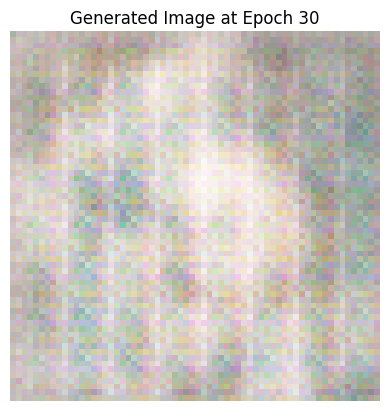

Epoch 31/100
Generator Loss: 1.0383, Discriminator Loss: 1.0747
Epoch 32/100
Generator Loss: 1.0078, Discriminator Loss: 1.0629
Epoch 33/100
Generator Loss: 0.8490, Discriminator Loss: 1.2367
Epoch 34/100
Generator Loss: 0.6050, Discriminator Loss: 1.3172
Epoch 35/100
Generator Loss: 0.6126, Discriminator Loss: 1.4208
Epoch 36/100
Generator Loss: 0.6578, Discriminator Loss: 1.3970
Epoch 37/100
Generator Loss: 0.6722, Discriminator Loss: 1.3762
Epoch 38/100
Generator Loss: 0.7134, Discriminator Loss: 1.4302
Epoch 39/100
Generator Loss: 0.6888, Discriminator Loss: 1.3714
Epoch 40/100
Generator Loss: 0.7000, Discriminator Loss: 1.3823


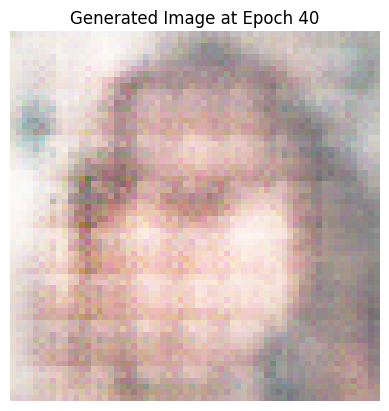

Epoch 41/100
Generator Loss: 0.6594, Discriminator Loss: 1.3771
Epoch 42/100
Generator Loss: 0.7689, Discriminator Loss: 1.3301
Epoch 43/100
Generator Loss: 0.6940, Discriminator Loss: 1.3905
Epoch 44/100
Generator Loss: 0.6445, Discriminator Loss: 1.3876
Epoch 45/100
Generator Loss: 0.7063, Discriminator Loss: 1.3515
Epoch 46/100
Generator Loss: 0.7305, Discriminator Loss: 1.4130
Epoch 47/100
Generator Loss: 0.6790, Discriminator Loss: 1.3775
Epoch 48/100
Generator Loss: 0.6635, Discriminator Loss: 1.3861
Epoch 49/100
Generator Loss: 0.6617, Discriminator Loss: 1.3588
Epoch 50/100
Generator Loss: 0.7356, Discriminator Loss: 1.4302


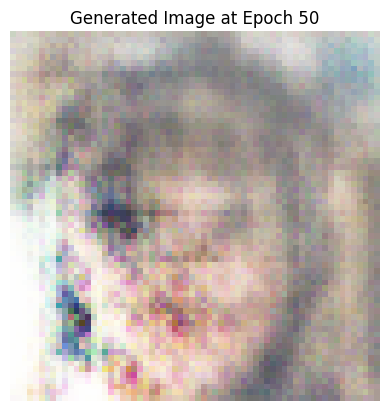

Epoch 51/100
Generator Loss: 0.7394, Discriminator Loss: 1.3263
Epoch 52/100
Generator Loss: 0.6570, Discriminator Loss: 1.3607
Epoch 53/100
Generator Loss: 0.6727, Discriminator Loss: 1.3764
Epoch 54/100
Generator Loss: 0.7508, Discriminator Loss: 1.3429
Epoch 55/100
Generator Loss: 0.7248, Discriminator Loss: 1.4903
Epoch 56/100
Generator Loss: 0.9228, Discriminator Loss: 1.3823
Epoch 57/100
Generator Loss: 0.6832, Discriminator Loss: 1.3554
Epoch 58/100
Generator Loss: 0.7330, Discriminator Loss: 1.3335
Epoch 59/100
Generator Loss: 0.6647, Discriminator Loss: 1.4728
Epoch 60/100
Generator Loss: 0.7500, Discriminator Loss: 1.3397


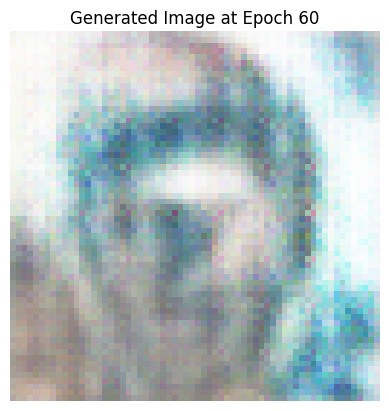

Epoch 61/100
Generator Loss: 0.7591, Discriminator Loss: 1.3237
Epoch 62/100
Generator Loss: 0.7209, Discriminator Loss: 1.3137
Epoch 63/100
Generator Loss: 0.6997, Discriminator Loss: 1.4051
Epoch 64/100
Generator Loss: 0.6577, Discriminator Loss: 1.4365
Epoch 65/100
Generator Loss: 0.6902, Discriminator Loss: 1.4979
Epoch 66/100
Generator Loss: 0.7489, Discriminator Loss: 1.5722
Epoch 67/100
Generator Loss: 0.6090, Discriminator Loss: 1.5194
Epoch 68/100
Generator Loss: 0.7772, Discriminator Loss: 1.3923
Epoch 69/100
Generator Loss: 0.6194, Discriminator Loss: 1.4198
Epoch 70/100
Generator Loss: 0.5609, Discriminator Loss: 1.4046


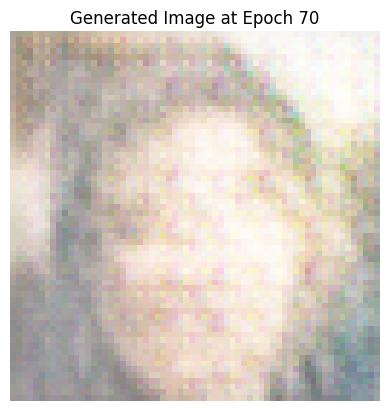

Epoch 71/100
Generator Loss: 0.6305, Discriminator Loss: 1.4056
Epoch 72/100
Generator Loss: 0.8138, Discriminator Loss: 1.2971
Epoch 73/100
Generator Loss: 0.8211, Discriminator Loss: 1.4146
Epoch 74/100
Generator Loss: 0.6914, Discriminator Loss: 1.3274
Epoch 75/100
Generator Loss: 0.7267, Discriminator Loss: 1.2656
Epoch 76/100
Generator Loss: 0.6609, Discriminator Loss: 1.4093
Epoch 77/100
Generator Loss: 0.5170, Discriminator Loss: 1.4816
Epoch 78/100
Generator Loss: 0.7735, Discriminator Loss: 1.4777
Epoch 79/100
Generator Loss: 0.7229, Discriminator Loss: 1.3645
Epoch 80/100
Generator Loss: 0.7177, Discriminator Loss: 1.3336


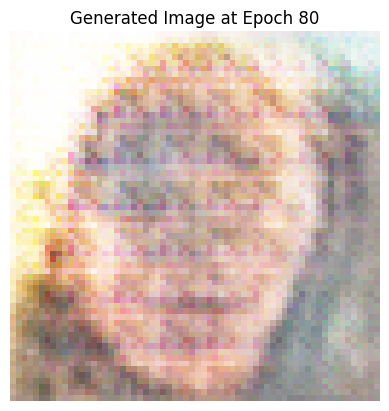

Epoch 81/100
Generator Loss: 0.6752, Discriminator Loss: 1.3652
Epoch 82/100
Generator Loss: 0.7227, Discriminator Loss: 1.3335
Epoch 83/100
Generator Loss: 0.7069, Discriminator Loss: 1.3428
Epoch 84/100
Generator Loss: 0.6227, Discriminator Loss: 1.2875
Epoch 85/100
Generator Loss: 0.8023, Discriminator Loss: 1.3906
Epoch 86/100
Generator Loss: 0.9379, Discriminator Loss: 1.3511
Epoch 87/100
Generator Loss: 0.7100, Discriminator Loss: 1.3717
Epoch 88/100
Generator Loss: 0.6138, Discriminator Loss: 1.4204
Epoch 89/100
Generator Loss: 0.5293, Discriminator Loss: 1.4929
Epoch 90/100
Generator Loss: 0.6517, Discriminator Loss: 1.4449


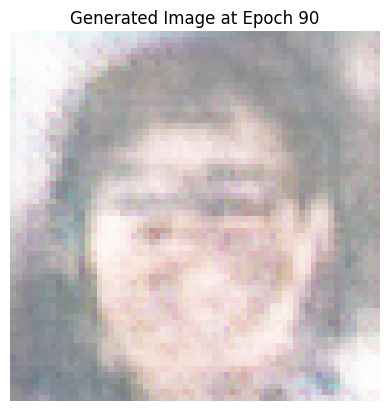

Epoch 91/100
Generator Loss: 0.7642, Discriminator Loss: 1.3557
Epoch 92/100
Generator Loss: 0.6863, Discriminator Loss: 1.3218
Epoch 93/100
Generator Loss: 0.8446, Discriminator Loss: 1.3428
Epoch 94/100
Generator Loss: 0.8622, Discriminator Loss: 1.3571
Epoch 95/100
Generator Loss: 0.7644, Discriminator Loss: 1.2980
Epoch 96/100
Generator Loss: 0.6221, Discriminator Loss: 1.3664
Epoch 97/100
Generator Loss: 0.8654, Discriminator Loss: 1.4050
Epoch 98/100
Generator Loss: 0.8331, Discriminator Loss: 1.3351
Epoch 99/100
Generator Loss: 0.6930, Discriminator Loss: 1.3636
Epoch 100/100
Generator Loss: 0.7510, Discriminator Loss: 1.2937


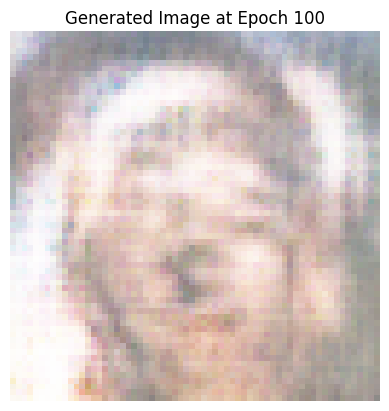

Generator saved to generator_model.h5

Extracting features and applying ensemble methods...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step

Classification Report:
               precision    recall  f1-score   support

         0.0       0.63      0.35      0.45        34
         1.0       0.51      0.77      0.61        30

    accuracy                           0.55        64
   macro avg       0.57      0.56      0.53        64
weighted avg       0.58      0.55      0.53        64


Confusion Matrix:
 [[12 22]
 [ 7 23]]

Overall Accuracy: 54.69%


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
import numpy as np
import os
# import argparse  # Removed argparse - No longer needed
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

# 1. Configuration
IMG_SIZE = 64
CHANNELS = 3
LATENT_DIM = 100
BATCH_SIZE = 32
EPOCHS = 100
DATA_DIR = '/content/deepfake-detection'

# 2. Load Data
train_datagen = ImageDataGenerator(rescale=1./255)
data_flow = train_datagen.flow_from_directory(
    DATA_DIR,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='binary',
    shuffle=True
)

# 3. Generator Model with Ensemble Layer Output
ensemble_features_gen = []  # This list is not used in the current code
def build_generator():
    model = tf.keras.Sequential()
    model.add(layers.Dense(8*8*256, use_bias=False, input_shape=(LATENT_DIM,)))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())
    model.add(layers.Reshape((8, 8, 256)))

    model.add(layers.Conv2DTranspose(128, (5, 5), strides=(2, 2), padding='same', use_bias=False))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Conv2DTranspose(64, (5, 5), strides=(2, 2), padding='same', use_bias=False))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Conv2DTranspose(CHANNELS, (5, 5), strides=(2, 2), padding='same', use_bias=False, activation='tanh'))
    return model

# 4. Discriminator Model with Ensemble Layer Output
ensemble_features_disc = []  # This list is not used in the current code
def build_discriminator():
    model = tf.keras.Sequential()
    model.add(layers.Conv2D(64, (5, 5), strides=(2, 2), padding='same', input_shape=[IMG_SIZE, IMG_SIZE, CHANNELS]))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))

    model.add(layers.Conv2D(128, (5, 5), strides=(2, 2), padding='same'))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))

    model.add(layers.Flatten())
    model.add(layers.Dense(1))
    return model

# 5. Loss Functions and Optimizers
cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)

def discriminator_loss(real_output, fake_output):
    real_loss = cross_entropy(tf.ones_like(real_output), real_output)
    fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output)
    return real_loss + fake_loss

def generator_loss(fake_output):
    return cross_entropy(tf.ones_like(fake_output), fake_output)

generator = build_generator()
discriminator = build_discriminator()

generator_optimizer = tf.keras.optimizers.Adam(learning_rate=0.0002, beta_1=0.5)
discriminator_optimizer = tf.keras.optimizers.Adam(learning_rate=0.0002, beta_1=0.5)

# 6. Training Loop
@tf.function
def train_step(images):
    noise = tf.random.normal([BATCH_SIZE, LATENT_DIM])
    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
        generated_images = generator(noise, training=True)
        real_output = discriminator(images, training=True)
        fake_output = discriminator(generated_images, training=True)
        gen_loss = generator_loss(fake_output)
        disc_loss = discriminator_loss(real_output, fake_output)
    gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
    gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)
    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))
    return gen_loss, disc_loss

def train(dataset, epochs):
    for epoch in range(epochs):
        print(f"Epoch {epoch+1}/{epochs}")
        for i, (image_batch, _) in enumerate(dataset):
            if i * BATCH_SIZE >= 1000:
                break
            gen_loss, disc_loss = train_step(image_batch)
        print(f"Generator Loss: {gen_loss.numpy():.4f}, Discriminator Loss: {disc_loss.numpy():.4f}")
        if (epoch + 1) % 10 == 0:
            noise = tf.random.normal([1, LATENT_DIM])
            generated_image = generator(noise, training=False)
            plt.imshow((generated_image[0] + 1) / 2)
            plt.title(f"Generated Image at Epoch {epoch+1}")
            plt.axis('off')
            plt.show()

if __name__ == '__main__':
    # Instead of using argparse, we'll set these values directly:
    train_GAN = True  # Set to True to train the GAN
    save_generator_path = 'generator_model.h5'  # Path to save the generator (optional)
    test_generator_path = None  # Path to a saved generator for testing (optional)

    train_dataset = data_flow

    if train_GAN:
        train(train_dataset, EPOCHS)

    if save_generator_path:
        generator.save(save_generator_path, save_format='h5')
        print(f"Generator saved to {save_generator_path}")

    if test_generator_path:
        loaded_generator = tf.keras.models.load_model(test_generator_path, compile=False)
        noise = tf.random.normal([1, LATENT_DIM])
        generated_image = loaded_generator(noise, training=False)
        plt.imshow((generated_image[0] + 1) / 2)
        plt.title("Generated Image from Loaded Generator")
        plt.axis('off')
        plt.show()

    print("\nExtracting features and applying ensemble methods...")
    X = []
    y = []
    for _ in range(10):
        img_batch, label_batch = next(data_flow)
        predictions = discriminator.predict(img_batch)
        X.extend(predictions)
        y.extend(label_batch)

    X = np.array(X).reshape(-1, 1)
    y = np.array(y)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    param_grid_svc = {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf'],
        'probability': [True]
    }
    svc = GridSearchCV(SVC(), param_grid_svc, cv=3)
    svc.fit(X_train, y_train)

    param_grid_rf = {
        'n_estimators': [100, 200],
        'max_depth': [10, 20, None]
    }
    rf = GridSearchCV(RandomForestClassifier(), param_grid_rf, cv=3)
    rf.fit(X_train, y_train)

    param_grid_gb = {
        'n_estimators': [50, 100],
        'learning_rate': [0.05, 0.1]
    }
    gb = GridSearchCV(GradientBoostingClassifier(), param_grid_gb, cv=3)
    gb.fit(X_train, y_train)

    clf1 = LogisticRegression(max_iter=1000)
    clf2 = rf.best_estimator_
    clf3 = svc.best_estimator_
    clf4 = GaussianNB()
    clf5 = gb.best_estimator_
    clf6 = AdaBoostClassifier(n_estimators=100)
    clf7 = ExtraTreesClassifier(n_estimators=100, max_depth=10)

    ensemble = VotingClassifier(estimators=[
        ('lr', clf1),
        ('rf', clf2),
        ('svc', clf3),
        ('nb', clf4),
        ('gb', clf5),
        ('ada', clf6),
        ('et', clf7)
    ], voting='soft')

    ensemble.fit(X_train, y_train)
    y_pred = ensemble.predict(X_test)

    print("\nClassification Report:\n", classification_report(y_test, y_pred))
    print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("\nOverall Accuracy: {:.2f}%".format(accuracy_score(y_test, y_pred) * 100))

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
import torchvision.datasets as datasets
from torch.utils.data import DataLoader
from torchvision import models
from tqdm import tqdm
import os

# Check GPU availability
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# ------------------------------
# Define Deepfake Detection Model (CNN-based)
# ------------------------------

class DeepfakeDetector(nn.Module):
    def __init__(self, pretrained_model='efficientnet_b0'):
        super(DeepfakeDetector, self).__init__()

        # Load pre-trained model (EfficientNet-B0 by default)
        self.feature_extractor = models.__dict__[pretrained_model](pretrained=True)

        # Modify the classifier head for binary classification (real/fake)
        num_ftrs = self.feature_extractor.classifier[1].in_features
        self.feature_extractor.classifier = nn.Sequential(
            nn.Dropout(p=0.2, inplace=True),
            nn.Linear(num_ftrs, 1),  # Output a single value for real/fake
            nn.Sigmoid()  # Apply sigmoid for probability
        )

    def forward(self, x):
        return self.feature_extractor(x)

# ------------------------------
# Initialize model, optimizer and loss function
# ------------------------------
model = DeepfakeDetector().to(device)
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001)

# ------------------------------
# Load Deepfake dataset (same as before)
# ------------------------------
data_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

train_set = datasets.ImageFolder(root='./deepfake-detection', transform=data_transform)
train_loader = DataLoader(train_set, batch_size=32, shuffle=True)  # Adjust batch size if needed

# ------------------------------
# Training the Model
# ------------------------------
def train_model(model, train_loader, criterion, optimizer, num_epochs=10):
    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0

        for inputs, labels in tqdm(train_loader, desc=f"Epoch {epoch+1}/{num_epochs}", leave=True):
            inputs, labels = inputs.to(device), labels.to(device).float().unsqueeze(1) # Convert labels to float and add dimension

            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()

        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss / len(train_loader):.4f}")

# Train the model
train_model(model, train_loader, criterion, optimizer)

# ------------------------------
# Evaluate the Model
# ------------------------------
def evaluate_model(model, train_loader):
    model.eval()
    correct, total = 0, 0
    with torch.no_grad():
        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            predicted = (outputs > 0.5).float()
            total += labels.size(0)
            correct += (predicted.squeeze(1) == labels.float()).sum().item() # Compare after squeezing predicted and converting labels

    accuracy = 100 * correct / total
    print(f"Deepfake Detection Accuracy: {accuracy:.2f}%")

evaluate_model(model, train_loader)

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=EfficientNet_B0_Weights.IMAGENET1K_V1`. You can also use `weights=EfficientNet_B0_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/efficientnet_b0_rwightman-7f5810bc.pth" to /root/.cache/torch/hub/checkpoints/efficientnet_b0_rwightman-7f5810bc.pth
100%|██████████| 20.5M/20.5M [00:00<00:00, 165MB/s]
Epoch 1/10: 100%|██████████| 64/64 [05:07<00:00,  4.80s/it]


Epoch [1/10], Loss: 0.6613


Epoch 2/10: 100%|██████████| 64/64 [04:59<00:00,  4.67s/it]


Epoch [2/10], Loss: 0.5027


Epoch 3/10: 100%|██████████| 64/64 [04:54<00:00,  4.61s/it]


Epoch [3/10], Loss: 0.3228


Epoch 4/10: 100%|██████████| 64/64 [04:54<00:00,  4.60s/it]


Epoch [4/10], Loss: 0.1757


Epoch 5/10: 100%|██████████| 64/64 [04:54<00:00,  4.60s/it]


Epoch [5/10], Loss: 0.1267


Epoch 6/10: 100%|██████████| 64/64 [05:06<00:00,  4.80s/it]


Epoch [6/10], Loss: 0.0824


Epoch 7/10: 100%|██████████| 64/64 [04:59<00:00,  4.68s/it]


Epoch [7/10], Loss: 0.0485


Epoch 8/10: 100%|██████████| 64/64 [04:58<00:00,  4.66s/it]


Epoch [8/10], Loss: 0.0543


Epoch 9/10: 100%|██████████| 64/64 [04:57<00:00,  4.65s/it]


Epoch [9/10], Loss: 0.0499


Epoch 10/10: 100%|██████████| 64/64 [04:59<00:00,  4.68s/it]


Epoch [10/10], Loss: 0.0366
Deepfake Detection Accuracy: 100.00%


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
import torchvision.datasets as datasets
from torch.utils.data import DataLoader
from torchvision import models
from tqdm import tqdm
import os

# Check GPU availability
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Define the Deepfake Detector model
class DeepfakeDetector(nn.Module):
    def __init__(self, pretrained_model='efficientnet_b0'):
        super(DeepfakeDetector, self).__init__()
        self.feature_extractor = models.__dict__[pretrained_model](pretrained=True)
        num_ftrs = self.feature_extractor.classifier[1].in_features
        self.feature_extractor.classifier = nn.Sequential(
            nn.Dropout(p=0.2, inplace=True),
            nn.Linear(num_ftrs, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.feature_extractor(x)

# Data augmentation and normalization for training
data_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),  # Data augmentation: Random Horizontal Flip
    transforms.RandomRotation(10),    # Data augmentation: Random Rotation
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# Load the dataset
train_set = datasets.ImageFolder(root='./deepfake-detection', transform=data_transform)

# Split the dataset into train, validation, and test sets
train_size = int(0.8 * len(train_set))
val_size = int(0.1 * len(train_set))
test_size = len(train_set) - train_size - val_size
train_dataset, val_dataset, test_dataset = torch.utils.data.random_split(
    train_set, [train_size, val_size, test_size]
)

# Create data loaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Initialize model, optimizer, and loss function
model = DeepfakeDetector().to(device)
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001, weight_decay=0.001)  # Added weight decay

# Training function with validation and early stopping
def train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs=5, patience=3):
    best_val_loss = float('inf')
    epochs_no_improve = 0

    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0

        for inputs, labels in tqdm(train_loader, desc=f"Epoch {epoch+1}/{num_epochs}", leave=True):
            inputs, labels = inputs.to(device), labels.to(device).float().unsqueeze(1)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()

        epoch_loss = running_loss / len(train_loader)
        print(f"Epoch [{epoch+1}/{num_epochs}], Train Loss: {epoch_loss:.4f}")

        # Validation
        model.eval()
        val_loss = 0.0
        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs, labels = inputs.to(device), labels.to(device).float().unsqueeze(1)
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                val_loss += loss.item()

        val_loss /= len(val_loader)
        print(f"Epoch [{epoch+1}/{num_epochs}], Validation Loss: {val_loss:.4f}")

        # Early stopping check
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            epochs_no_improve = 0
            torch.save(model.state_dict(), 'best_model.pth')  # Save the best model
        else:
            epochs_no_improve += 1
            if epochs_no_improve == patience:
                print("Early stopping triggered!")
                break

# Evaluation function
def evaluate_model(model, test_loader):
    model.eval()
    correct, total = 0, 0
    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            predicted = (outputs > 0.5).float()
            total += labels.size(0)
            correct += (predicted.squeeze(1) == labels.float()).sum().item()

    accuracy = 100 * correct / total
    print(f"Deepfake Detection Accuracy: {accuracy:.2f}%")


# Train the model
train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs=5)

# Load the best model and evaluate on the test set
model.load_state_dict(torch.load('best_model.pth'))
evaluate_model(model, test_loader)

Epoch 1/5: 100%|██████████| 51/51 [04:31<00:00,  5.33s/it]


Epoch [1/5], Train Loss: 0.6718
Epoch [1/5], Validation Loss: 0.6233


Epoch 2/5: 100%|██████████| 51/51 [04:30<00:00,  5.30s/it]


Epoch [2/5], Train Loss: 0.5701
Epoch [2/5], Validation Loss: 0.5660


Epoch 3/5: 100%|██████████| 51/51 [04:31<00:00,  5.32s/it]


Epoch [3/5], Train Loss: 0.4506
Epoch [3/5], Validation Loss: 0.5267


Epoch 4/5: 100%|██████████| 51/51 [04:27<00:00,  5.24s/it]


Epoch [4/5], Train Loss: 0.3275
Epoch [4/5], Validation Loss: 0.5544


Epoch 5/5: 100%|██████████| 51/51 [04:28<00:00,  5.26s/it]


Epoch [5/5], Train Loss: 0.2444
Epoch [5/5], Validation Loss: 0.5037
Deepfake Detection Accuracy: 72.20%


In [ ]:
!pip install timm

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 55.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 36.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 68.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 554.3 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 1.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 866.9 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 49.1 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitl

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
import torchvision.datasets as datasets
from torch.utils.data import DataLoader
from tqdm import tqdm
import timm  # For loading Vision Transformer models
import os

# Check GPU availability
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# ------------------------------
# Define Deepfake Detection Model (ViT-based)
# ------------------------------

class DeepfakeDetectorViT(nn.Module):
    def __init__(self, pretrained_model='vit_base_patch16_224'):
        super(DeepfakeDetectorViT, self).__init__()

        # Load pre-trained ViT model
        self.feature_extractor = timm.create_model(pretrained_model, pretrained=True)

        # Modify the classifier head for binary classification
        num_ftrs = self.feature_extractor.head.in_features
        self.feature_extractor.head = nn.Sequential(
            nn.Dropout(p=0.2, inplace=True),
            nn.Linear(num_ftrs, 1),  # Output for real/fake
            nn.Sigmoid()  # Apply sigmoid for probability
        )

    def forward(self, x):
        return self.feature_extractor(x)

# ------------------------------
# Initialize model, optimizer, and loss function
# ------------------------------
model = DeepfakeDetectorViT().to(device)
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001)

# ------------------------------
# Load Deepfake dataset (same as before)
# ------------------------------
data_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

train_set = datasets.ImageFolder(root='./deepfake-detection', transform=data_transform)
train_loader = DataLoader(train_set, batch_size=16, shuffle=True)  # Adjust batch size if needed

# ------------------------------
# Training the Model (same as before)
# ------------------------------
def train_model(model, train_loader, criterion, optimizer, num_epochs=10):
    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0

        for inputs, labels in tqdm(train_loader, desc=f"Epoch {epoch+1}/{num_epochs}", leave=True):
            inputs, labels = inputs.to(device), labels.to(device).float().unsqueeze(1) # Convert labels to float and add dimension

            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()

        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss / len(train_loader):.4f}")

# Train the model# ... (same as in previous example) ...

# Train the model
train_model(model, train_loader, criterion, optimizer)

# ------------------------------
# Evaluate the Model (same as before)
# ------------------------------
def evaluate_model(model, train_loader):
    model.eval()
    correct, total = 0, 0
    with torch.no_grad():
        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            predicted = (outputs > 0.5).float()
            total += labels.size(0)
            correct += (predicted.squeeze(1) == labels.float()).sum().item() # Compare after squeezing predicted and converting labels

    accuracy = 100 * correct / total
    print(f"Deepfake Detection Accuracy: {accuracy:.2f}%")
# ... (same as in previous example) ...

evaluate_model(model, train_loader)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model.safetensors:   0%|          | 0.00/346M [00:00<?, ?B/s]

Epoch 1/10: 100%|██████████| 128/128 [43:43<00:00, 20.49s/it]


Epoch [1/10], Loss: 0.7216


Epoch 2/10: 100%|██████████| 128/128 [43:59<00:00, 20.62s/it]


Epoch [2/10], Loss: 0.6810


Epoch 3/10: 100%|██████████| 128/128 [43:47<00:00, 20.53s/it]


Epoch [3/10], Loss: 0.6509


Epoch 4/10: 100%|██████████| 128/128 [43:53<00:00, 20.57s/it]


Epoch [4/10], Loss: 0.6166


Epoch 5/10: 100%|██████████| 128/128 [43:18<00:00, 20.30s/it]


Epoch [5/10], Loss: 0.5445


Epoch 6/10: 100%|██████████| 128/128 [43:20<00:00, 20.32s/it]


Epoch [6/10], Loss: 0.4838


Epoch 7/10: 100%|██████████| 128/128 [43:24<00:00, 20.35s/it]


Epoch [7/10], Loss: 0.3072


Epoch 8/10: 100%|██████████| 128/128 [43:55<00:00, 20.59s/it]


Epoch [8/10], Loss: 0.2061


Epoch 9/10: 100%|██████████| 128/128 [43:46<00:00, 20.52s/it]


Epoch [9/10], Loss: 0.1903


Epoch 10/10: 100%|██████████| 128/128 [43:52<00:00, 20.56s/it]


Epoch [10/10], Loss: 0.1379
Deepfake Detection Accuracy: 97.94%


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=EfficientNet_B0_Weights.IMAGENET1K_V1`. You can also use `weights=EfficientNet_B0_Weights.DEFAULT` to get the most u

Epoch [1/10], Loss: 0.6617


Epoch 2/10: 100%|██████████| 51/51 [13:40<00:00, 16.08s/it]


Epoch [2/10], Loss: 0.4347


Epoch 3/10: 100%|██████████| 51/51 [13:52<00:00, 16.33s/it]


Epoch [3/10], Loss: 0.1524


Epoch 4/10: 100%|██████████| 51/51 [13:38<00:00, 16.05s/it]


Epoch [4/10], Loss: 0.0767


Epoch 5/10: 100%|██████████| 51/51 [13:54<00:00, 16.36s/it]


Epoch [5/10], Loss: 0.0523


Epoch 6/10: 100%|██████████| 51/51 [13:44<00:00, 16.17s/it]


Epoch [6/10], Loss: 0.0438


Epoch 7/10: 100%|██████████| 51/51 [13:45<00:00, 16.19s/it]


Epoch [7/10], Loss: 0.0407


Epoch 8/10: 100%|██████████| 51/51 [13:48<00:00, 16.24s/it]


Epoch [8/10], Loss: 0.0404


Epoch 9/10: 100%|██████████| 51/51 [14:24<00:00, 16.95s/it]


Epoch [9/10], Loss: 0.0245


Epoch 10/10: 100%|██████████| 51/51 [13:57<00:00, 16.42s/it]


Epoch [10/10], Loss: 0.0248


<ipython-input-5-691699ac17ea>:122: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at /pytorch/torch/csrc/utils/tensor_new.cpp:254.)
  all_preds_tensor = torch.tensor(all_preds).squeeze()



🔍 Evaluation Metrics:
✅ Accuracy     : 0.7286
📏 Precision    : 0.8038
📈 Recall       : 0.6135
📊 F1 Score     : 0.6959
🔥 ROC AUC Score: 0.8070


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


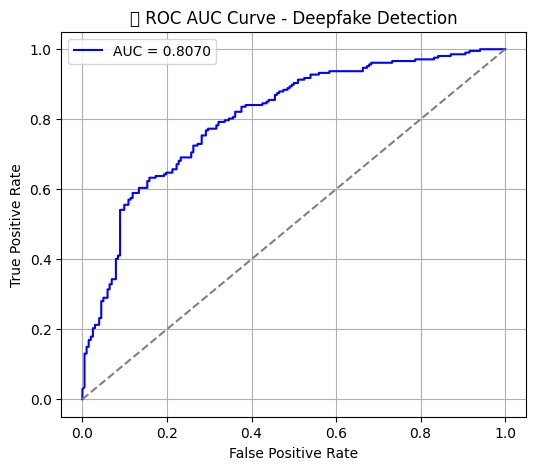

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
import torchvision.datasets as datasets
from torch.utils.data import DataLoader
from torchvision import models
from tqdm import tqdm
import os
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Check GPU availability
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# ------------------------------
# Ensemble Model combining ResNet18 and EfficientNet-B0
# ------------------------------
class EnsembleModel(nn.Module):
    def __init__(self):
        super(EnsembleModel, self).__init__()
        self.resnet = models.resnet18(pretrained=True)
        self.efficientnet = models.efficientnet_b0(pretrained=True)

        # Modify both classifiers to remove their heads
        self.resnet = nn.Sequential(*list(self.resnet.children())[:-1])  # remove final FC layer
        self.efficientnet = nn.Sequential(*list(self.efficientnet.children())[:-1])

        self.dropout = nn.Dropout(p=0.5)
        self.classifier = nn.Sequential(
            nn.Linear(512 + 1280, 512),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(512, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        resnet_feat = self.resnet(x).view(x.size(0), -1)
        eff_feat = self.efficientnet(x).view(x.size(0), -1)
        combined = torch.cat((resnet_feat, eff_feat), dim=1)
        return self.classifier(self.dropout(combined))

# ------------------------------
# Initialize model, optimizer, loss, and checkpoint path
# ------------------------------
model = EnsembleModel().to(device)
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001)
checkpoint_path = "deepfake_checkpoint.pth"
start_epoch = 0
num_epochs = 10

# Resume from checkpoint if exists
if os.path.exists(checkpoint_path):
    checkpoint = torch.load(checkpoint_path)
    model.load_state_dict(checkpoint['model_state_dict'])
    optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
    start_epoch = checkpoint['epoch'] + 1
    print(f"Resumed training from epoch {start_epoch}")

# ------------------------------
# Dataset loading and preprocessing
# ------------------------------
data_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

dataset = datasets.ImageFolder(root='./deepfake-detection', transform=data_transform)
train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size
train_set, val_set = torch.utils.data.random_split(dataset, [train_size, val_size])
train_loader = DataLoader(train_set, batch_size=32, shuffle=True)
val_loader = DataLoader(val_set, batch_size=32, shuffle=False)

# ------------------------------
# Training function
# ------------------------------
def train_model(model, train_loader, criterion, optimizer, num_epochs=10):
    for epoch in range(start_epoch, num_epochs):
        model.train()
        running_loss = 0.0

        for inputs, labels in tqdm(train_loader, desc=f"Epoch {epoch+1}/{num_epochs}"):
            inputs, labels = inputs.to(device), labels.to(device).float().unsqueeze(1)

            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()

        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss / len(train_loader):.4f}")

        # Save checkpoint
        torch.save({
            'epoch': epoch,
            'model_state_dict': model.state_dict(),
            'optimizer_state_dict': optimizer.state_dict(),
        }, checkpoint_path)

# ------------------------------
# Evaluation function
# ------------------------------
def evaluate_model(model, loader):
    model.eval()
    all_labels = []
    all_preds = []

    with torch.no_grad():
        for inputs, labels in loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            all_labels.extend(labels.cpu().numpy())
            all_preds.extend(outputs.cpu().numpy())

    all_labels = torch.tensor(all_labels).int()
    all_preds_tensor = torch.tensor(all_preds).squeeze()
    pred_labels = (all_preds_tensor > 0.5).int()

    acc = accuracy_score(all_labels, pred_labels)
    prec = precision_score(all_labels, pred_labels)
    rec = recall_score(all_labels, pred_labels)
    f1 = f1_score(all_labels, pred_labels)
    auc = roc_auc_score(all_labels, all_preds_tensor)

    print("\n🔍 Evaluation Metrics:")
    print(f"✅ Accuracy     : {acc:.4f}")
    print(f"📏 Precision    : {prec:.4f}")
    print(f"📈 Recall       : {rec:.4f}")
    print(f"📊 F1 Score     : {f1:.4f}")
    print(f"🔥 ROC AUC Score: {auc:.4f}")

    fpr, tpr, _ = roc_curve(all_labels, all_preds_tensor)
    plt.figure(figsize=(6, 5))
    plt.plot(fpr, tpr, label=f'AUC = {auc:.4f}', color='blue')
    plt.plot([0, 1], [0, 1], '--', color='gray')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('📉 ROC AUC Curve - Deepfake Detection')
    plt.legend()
    plt.grid()
    plt.show()

# ------------------------------
# Run training and evaluation
# ------------------------------
train_model(model, train_loader, criterion, optimizer, num_epochs=num_epochs)
evaluate_model(model, val_loader)

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import models, datasets, transforms
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import os
from tqdm import tqdm

# Check for GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# ------------------------------
# ------------------------------
# Ensemble Model: MobileNetV2 + EfficientNet-B0 + InceptionV3
# ------------------------------
class DeepfakeEnsemble(nn.Module):
    def __init__(self):
        super(DeepfakeEnsemble, self).__init__()

        # MobileNetV2 instead of ResNet18
        self.mobilenet = models.mobilenet_v2(pretrained=True)
        self.mobilenet.classifier = nn.Identity()

        self.efficientnet = models.efficientnet_b0(pretrained=True)
        self.efficientnet.classifier = nn.Identity()

        self.inception = models.inception_v3(pretrained=True, aux_logits=True)  # Keep aux_logits=True for training
        self.inception.fc = nn.Identity()

        self.dropout = nn.Dropout(0.4)
        self.classifier = nn.Sequential(
            nn.Linear(1280 + 1280 + 2048, 256),  # Updated input size: MobileNetV2 (1280) + EfficientNet-B0 (1280) + InceptionV3 (2048)
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(256, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        x1 = self.mobilenet(x)
        x2 = self.efficientnet(x)
        # Access the main output logits of InceptionV3
        x3 = self.inception(x).logits
        x_concat = torch.cat((x1, x2, x3), dim=1)
        return self.classifier(self.dropout(x_concat))


# ... (rest of the code remains the same) ...
# ------------------------------
# Data Transform
# ------------------------------
data_transform = transforms.Compose([
    transforms.Resize((299, 299)),  # for Inception
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

# Dataset & Loader
train_set = datasets.ImageFolder(root='./deepfake-detection', transform=data_transform)
train_loader = DataLoader(train_set, batch_size=16, shuffle=True)

# ------------------------------
# Initialize model, loss, optimizer
# ------------------------------
model = DeepfakeEnsemble().to(device)
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=1e-4)

# ------------------------------
# Checkpoint paths
# ------------------------------
checkpoint_path = "deepfake_ensemble_checkpoint.pth"
start_epoch = 0
num_epochs = 5

# Resume if checkpoint exists
if os.path.exists(checkpoint_path):
    checkpoint = torch.load(checkpoint_path)
    model.load_state_dict(checkpoint['model_state_dict'])
    optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
    start_epoch = checkpoint['epoch'] + 1
    print(f"Resuming from epoch {start_epoch}")

# ------------------------------
# Train function
# ------------------------------
def train_model(model, loader, criterion, optimizer, start_epoch, num_epochs):
    for epoch in range(start_epoch, num_epochs):
        model.train()
        running_loss = 0.0

        for inputs, labels in tqdm(loader, desc=f"Epoch {epoch+1}/{num_epochs}"):
            inputs, labels = inputs.to(device), labels.to(device).float().unsqueeze(1)

            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()

        print(f"Epoch {epoch+1}/{num_epochs}, Loss: {running_loss/len(loader):.4f}")

        # Save checkpoint
        torch.save({
            'epoch': epoch,
            'model_state_dict': model.state_dict(),
            'optimizer_state_dict': optimizer.state_dict()
        }, checkpoint_path)

train_model(model, train_loader, criterion, optimizer, start_epoch, num_epochs)

# ------------------------------
# Evaluation function
# ------------------------------
def evaluate_model(model, loader):
    model.eval()
    y_true, y_pred, y_scores = [], [], []

    with torch.no_grad():
        for inputs, labels in loader:
            inputs = inputs.to(device)
            labels = labels.to(device).float()
            outputs = model(inputs).squeeze(1)
            preds = (outputs > 0.5).float()

            y_true.extend(labels.cpu().numpy())
            y_pred.extend(preds.cpu().numpy())
            y_scores.extend(outputs.cpu().numpy())

    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred)
    rec = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    auc = roc_auc_score(y_true, y_scores)

    print(f"Accuracy: {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall: {rec:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"ROC AUC: {auc:.4f}")

    # Plot ROC Curve
    fpr, tpr, _ = roc_curve(y_true, y_scores)
    plt.figure()
    plt.plot(fpr, tpr, label=f'ROC curve (area = {auc:.2f})')
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend()
    plt.grid(True)
    plt.show()

evaluate_model(model, train_loader)



/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MobileNet_V2_Weights.IMAGENET1K_V1`. You can also use `weights=MobileNet_V2_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=EfficientNet_B0_Weights.IMAGENET1K_V1`. You can also use `weights=EfficientNet_B0_Weights.DEFAULT` to get th

Epoch 1/5, Loss: 0.6354


Epoch 2/5: 100%|██████████| 128/128 [01:23<00:00,  1.53it/s]


Epoch 2/5, Loss: 0.4137


Epoch 3/5: 100%|██████████| 128/128 [01:23<00:00,  1.54it/s]


Epoch 3/5, Loss: 0.2075


Epoch 4/5: 100%|██████████| 128/128 [01:26<00:00,  1.48it/s]


Epoch 4/5, Loss: 0.1572


Epoch 5/5: 100%|██████████| 128/128 [01:23<00:00,  1.53it/s]


Epoch 5/5, Loss: 0.1032


AttributeError: 'Tensor' object has no attribute 'logits'

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MobileNet_V2_Weights.IMAGENET1K_V1`. You can also use `weights=MobileNet_V2_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=EfficientNet_B0_Weights.IMAGENET1K_V1`. You can also use `weights=EfficientNet_B0_Weights.DEFAULT` to get th

Resuming from epoch 5
Accuracy: 0.9936
Precision: 0.9899
Recall: 0.9981
F1 Score: 0.9940
ROC AUC: 0.9997


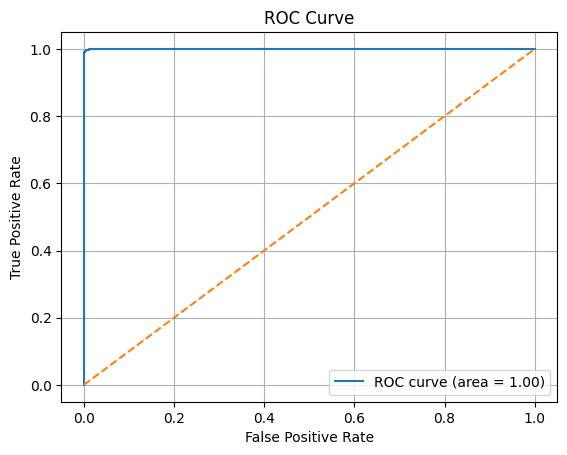

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import models, datasets, transforms
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import os
from tqdm import tqdm

# Check for GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# ------------------------------
# ------------------------------
# Ensemble Model: MobileNetV2 + EfficientNet-B0 + InceptionV3
# ------------------------------
class DeepfakeEnsemble(nn.Module):
    def __init__(self):
        super(DeepfakeEnsemble, self).__init__()

        # MobileNetV2 instead of ResNet18
        self.mobilenet = models.mobilenet_v2(pretrained=True)
        self.mobilenet.classifier = nn.Identity()

        self.efficientnet = models.efficientnet_b0(pretrained=True)
        self.efficientnet.classifier = nn.Identity()

        self.inception = models.inception_v3(pretrained=True, aux_logits=True)  # Keep aux_logits=True for training
        self.inception.fc = nn.Identity()

        self.dropout = nn.Dropout(0.4)
        self.classifier = nn.Sequential(
            nn.Linear(1280 + 1280 + 2048, 256),  # Updated input size: MobileNetV2 (1280) + EfficientNet-B0 (1280) + InceptionV3 (2048)
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(256, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        x1 = self.mobilenet(x)
        x2 = self.efficientnet(x)

        # Check if aux_logits are enabled and if the model is training
        if self.training and self.inception.aux_logits:
            x3 = self.inception(x).logits
        else:
            x3 = self.inception(x)  # Output is now just a tensor

        x_concat = torch.cat((x1, x2, x3), dim=1)
        return self.classifier(self.dropout(x_concat)) # Added return statement


# ... (rest of the code remains the same) ...
# ------------------------------
# Data Transform
# ------------------------------
data_transform = transforms.Compose([
    transforms.Resize((299, 299)),  # for Inception
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

# Dataset & Loader
train_set = datasets.ImageFolder(root='./deepfake-detection', transform=data_transform)
train_loader = DataLoader(train_set, batch_size=16, shuffle=True)

# ------------------------------
# Initialize model, loss, optimizer
# ------------------------------
model = DeepfakeEnsemble().to(device)
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=1e-4)

# ------------------------------
# Checkpoint paths
# ------------------------------
checkpoint_path = "deepfake_ensemble_checkpoint.pth"
start_epoch = 0
num_epochs = 5

# Resume if checkpoint exists
if os.path.exists(checkpoint_path):
    checkpoint = torch.load(checkpoint_path)
    model.load_state_dict(checkpoint['model_state_dict'])
    optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
    start_epoch = checkpoint['epoch'] + 1
    print(f"Resuming from epoch {start_epoch}")

# ------------------------------
# Train function
# ------------------------------
def train_model(model, loader, criterion, optimizer, start_epoch, num_epochs):
    for epoch in range(start_epoch, num_epochs):
        model.train()
        running_loss = 0.0

        for inputs, labels in tqdm(loader, desc=f"Epoch {epoch+1}/{num_epochs}"):
            inputs, labels = inputs.to(device), labels.to(device).float().unsqueeze(1)

            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()

        print(f"Epoch {epoch+1}/{num_epochs}, Loss: {running_loss/len(loader):.4f}")

        # Save checkpoint
        torch.save({
            'epoch': epoch,
            'model_state_dict': model.state_dict(),
            'optimizer_state_dict': optimizer.state_dict()
        }, checkpoint_path)

train_model(model, train_loader, criterion, optimizer, start_epoch, num_epochs)

# ------------------------------
# Evaluation function
# ------------------------------
def evaluate_model(model, loader):
    model.eval()
    y_true, y_pred, y_scores = [], [], []

    with torch.no_grad():
        for inputs, labels in loader:
            inputs = inputs.to(device)
            labels = labels.to(device).float()
            outputs = model(inputs).squeeze(1)
            preds = (outputs > 0.5).float()

            y_true.extend(labels.cpu().numpy())
            y_pred.extend(preds.cpu().numpy())
            y_scores.extend(outputs.cpu().numpy())

    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred)
    rec = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    auc = roc_auc_score(y_true, y_scores)

    print(f"Accuracy: {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall: {rec:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"ROC AUC: {auc:.4f}")

    # Plot ROC Curve
    fpr, tpr, _ = roc_curve(y_true, y_scores)
    plt.figure()
    plt.plot(fpr, tpr, label=f'ROC curve (area = {auc:.2f})')
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend()
    plt.grid(True)
    plt.show()

evaluate_model(model, train_loader)



In [ ]:
# ------------------------------
# DATASET SPLIT
# ------------------------------
from torch.utils.data import random_split

# Define sizes for train/test split (e.g., 80% train, 20% test)
train_size = int(0.8 * len(train_set))
test_size = len(train_set) - train_size

# Random split
train_dataset, test_dataset = random_split(train_set, [train_size, test_size])

# Data loaders
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)

print(f"Train Samples: {len(train_dataset)}, Test Samples: {len(test_dataset)}")


Train Samples: 1632, Test Samples: 409


Accuracy: 0.9853
Precision: 0.9780
Recall: 0.9955
F1 Score: 0.9867
ROC AUC: 0.9995


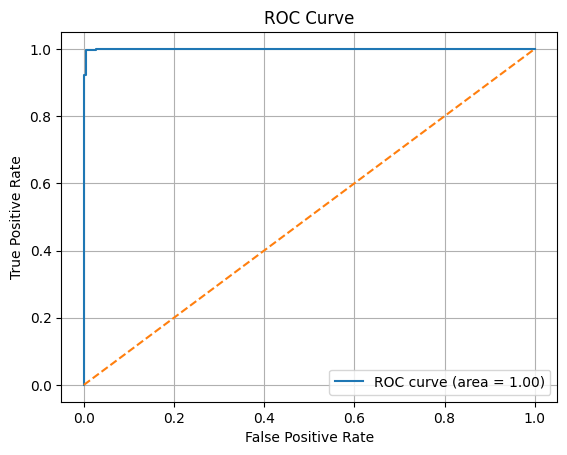

In [ ]:
train_model(model, train_loader, criterion, optimizer, start_epoch, num_epochs)

# After training, evaluate on TEST data
evaluate_model(model, test_loader)


In [ ]:
import numpy as np

def show_some_predictions(model, loader, num_samples=10):
    model.eval()
    samples_shown = 0

    with torch.no_grad():
        for inputs, labels in loader:
            inputs = inputs.to(device)
            labels = labels.to(device).float()
            outputs = model(inputs).squeeze(1)
            preds = (outputs > 0.5).float()

            for i in range(len(labels)):
                print(f"True Label: {int(labels[i].item())} | Predicted: {int(preds[i].item())} | Score: {outputs[i].item():.4f}")
                samples_shown += 1
                if samples_shown >= num_samples:
                    return

print("\nSample Predictions on Test Set:")
show_some_predictions(model, test_loader)



Sample Predictions on Test Set:
True Label: 0 | Predicted: 0 | Score: 0.0388
True Label: 0 | Predicted: 0 | Score: 0.0387
True Label: 0 | Predicted: 0 | Score: 0.0001
True Label: 0 | Predicted: 0 | Score: 0.0074
True Label: 1 | Predicted: 1 | Score: 1.0000
True Label: 0 | Predicted: 0 | Score: 0.0050
True Label: 0 | Predicted: 0 | Score: 0.0000
True Label: 1 | Predicted: 1 | Score: 1.0000
True Label: 1 | Predicted: 1 | Score: 0.9957
True Label: 0 | Predicted: 0 | Score: 0.0001


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MobileNet_V2_Weights.IMAGENET1K_V1`. You can also use `weights=MobileNet_V2_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/mobilenet_v2-b0353104.pth" to /root/.cache/torch/hub/checkpoints/mobilenet_v2-b0353104.pth
100%|██████████| 13.6M/13.6M [00:00<00:00, 108MB/s] 
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and

Epoch 1/5, Loss: 0.6314, Acc: 0.6242, F1: 0.6643, AUC: 0.6830


Epoch 2/5: 100%|██████████| 128/128 [01:24<00:00,  1.52it/s]


Epoch 2/5, Loss: 0.4155, Acc: 0.8168, F1: 0.8265, AUC: 0.8922


Epoch 3/5: 100%|██████████| 128/128 [01:24<00:00,  1.52it/s]


Epoch 3/5, Loss: 0.2263, Acc: 0.9113, F1: 0.9163, AUC: 0.9686


Epoch 4/5: 100%|██████████| 128/128 [01:24<00:00,  1.52it/s]


Epoch 4/5, Loss: 0.1355, Acc: 0.9510, F1: 0.9537, AUC: 0.9884


Epoch 5/5: 100%|██████████| 128/128 [01:24<00:00,  1.52it/s]


Epoch 5/5, Loss: 0.1321, Acc: 0.9500, F1: 0.9528, AUC: 0.9888


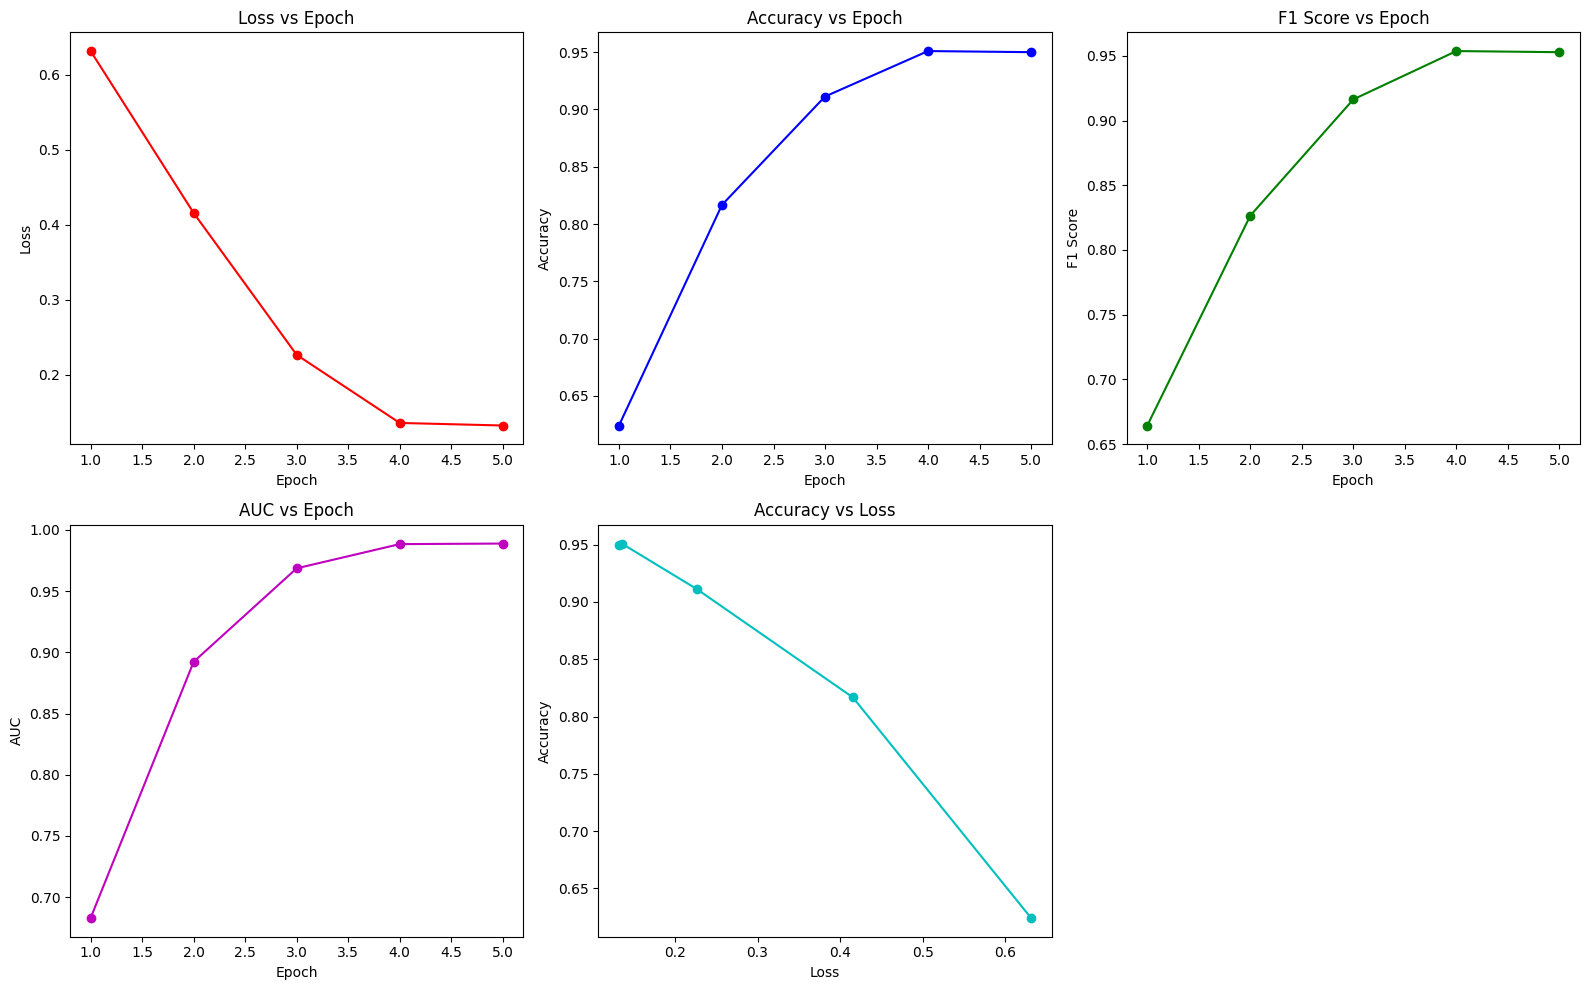

AttributeError: 'Tensor' object has no attribute 'logits'

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import models, datasets, transforms
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import os
from tqdm import tqdm

# Check for GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# ------------------------------
# Ensemble Model: MobileNetV2 + EfficientNet-B0 + InceptionV3
# ------------------------------
class DeepfakeEnsemble(nn.Module):
    def __init__(self):
        super(DeepfakeEnsemble, self).__init__()
        self.mobilenet = models.mobilenet_v2(pretrained=True)
        self.mobilenet.classifier = nn.Identity()

        self.efficientnet = models.efficientnet_b0(pretrained=True)
        self.efficientnet.classifier = nn.Identity()

        self.inception = models.inception_v3(pretrained=True, aux_logits=True)
        self.inception.fc = nn.Identity()

        self.dropout = nn.Dropout(0.4)
        self.classifier = nn.Sequential(
            nn.Linear(1280 + 1280 + 2048, 256),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(256, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        x1 = self.mobilenet(x)
        x2 = self.efficientnet(x)
        x3 = self.inception(x).logits
        x_concat = torch.cat((x1, x2, x3), dim=1)
        return self.classifier(self.dropout(x_concat))

# ------------------------------
# Data Transform
# ------------------------------
data_transform = transforms.Compose([
    transforms.Resize((299, 299)),  # For Inception
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

# Dataset & Loader
train_set = datasets.ImageFolder(root='./deepfake-detection', transform=data_transform)
train_loader = DataLoader(train_set, batch_size=16, shuffle=True)

# ------------------------------
# Initialize model, loss, optimizer
# ------------------------------
model = DeepfakeEnsemble().to(device)
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=1e-4)

# ------------------------------
# Checkpoint paths
# ------------------------------
checkpoint_path = "deepfake_ensemble_checkpoint.pth"
start_epoch = 0
num_epochs = 5

# Resume if checkpoint exists
if os.path.exists(checkpoint_path):
    checkpoint = torch.load(checkpoint_path)
    model.load_state_dict(checkpoint['model_state_dict'])
    optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
    start_epoch = checkpoint['epoch'] + 1
    print(f"Resuming from epoch {start_epoch}")

# ------------------------------
# Train function with metrics tracking
# ------------------------------
def train_model(model, loader, criterion, optimizer, start_epoch, num_epochs):
    history = {
        'epoch': [],
        'loss': [],
        'accuracy': [],
        'precision': [],
        'recall': [],
        'f1': [],
        'auc': []
    }

    for epoch in range(start_epoch, num_epochs):
        model.train()
        running_loss = 0.0
        y_true, y_pred, y_scores = [], [], []

        for inputs, labels in tqdm(loader, desc=f"Epoch {epoch+1}/{num_epochs}"):
            inputs, labels = inputs.to(device), labels.to(device).float().unsqueeze(1)

            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            preds = (outputs > 0.5).float()
            y_true.extend(labels.cpu().numpy())
            y_pred.extend(preds.cpu().numpy())
            y_scores.extend(outputs.detach().cpu().numpy())

        # Compute metrics
        epoch_loss = running_loss / len(loader)
        acc = accuracy_score(y_true, y_pred)
        prec = precision_score(y_true, y_pred)
        rec = recall_score(y_true, y_pred)
        f1 = f1_score(y_true, y_pred)
        auc = roc_auc_score(y_true, y_scores)

        print(f"Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss:.4f}, Acc: {acc:.4f}, F1: {f1:.4f}, AUC: {auc:.4f}")

        # Save metrics
        history['epoch'].append(epoch + 1)
        history['loss'].append(epoch_loss)
        history['accuracy'].append(acc)
        history['precision'].append(prec)
        history['recall'].append(rec)
        history['f1'].append(f1)
        history['auc'].append(auc)

        # Save checkpoint
        torch.save({
            'epoch': epoch,
            'model_state_dict': model.state_dict(),
            'optimizer_state_dict': optimizer.state_dict()
        }, checkpoint_path)

    return history

# ------------------------------
# Training and History Tracking
# ------------------------------
history = train_model(model, train_loader, criterion, optimizer, start_epoch, num_epochs)

# ------------------------------
# Plotting Training Metrics
# ------------------------------
def plot_training_history(history):
    epochs = history['epoch']

    plt.figure(figsize=(16, 10))

    plt.subplot(2, 3, 1)
    plt.plot(epochs, history['loss'], 'r-o')
    plt.title("Loss vs Epoch")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")

    plt.subplot(2, 3, 2)
    plt.plot(epochs, history['accuracy'], 'b-o')
    plt.title("Accuracy vs Epoch")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")

    plt.subplot(2, 3, 3)
    plt.plot(epochs, history['f1'], 'g-o')
    plt.title("F1 Score vs Epoch")
    plt.xlabel("Epoch")
    plt.ylabel("F1 Score")

    plt.subplot(2, 3, 4)
    plt.plot(epochs, history['auc'], 'm-o')
    plt.title("AUC vs Epoch")
    plt.xlabel("Epoch")
    plt.ylabel("AUC")

    plt.subplot(2, 3, 5)
    plt.plot(history['loss'], history['accuracy'], 'c-o')
    plt.title("Accuracy vs Loss")
    plt.xlabel("Loss")
    plt.ylabel("Accuracy")

    plt.tight_layout()
    plt.show()

plot_training_history(history)

# ------------------------------
# Final Evaluation
# ------------------------------
def evaluate_model(model, loader):
    model.eval()
    y_true, y_pred, y_scores = [], [], []

    with torch.no_grad():
        for inputs, labels in loader:
            inputs = inputs.to(device)
            labels = labels.to(device).float()
            outputs = model(inputs).squeeze(1)
            preds = (outputs > 0.5).float()

            y_true.extend(labels.cpu().numpy())
            y_pred.extend(preds.cpu().numpy())
            y_scores.extend(outputs.cpu().numpy())

    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred)
    rec = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    auc = roc_auc_score(y_true, y_scores)

    print(f"Accuracy: {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall: {rec:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"ROC AUC: {auc:.4f}")

    # Plot ROC Curve
    fpr, tpr, _ = roc_curve(y_true, y_scores)
    plt.figure()
    plt.plot(fpr, tpr, label=f'ROC curve (area = {auc:.2f})')
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend()
    plt.grid(True)
    plt.show()

evaluate_model(model, train_loader)


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MobileNet_V2_Weights.IMAGENET1K_V1`. You can also use `weights=MobileNet_V2_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=EfficientNet_B0_Weights.IMAGENET1K_V1`. You can also use `weights=EfficientNet_B0_Weights.DEFAULT` to get th

Resuming from epoch 5


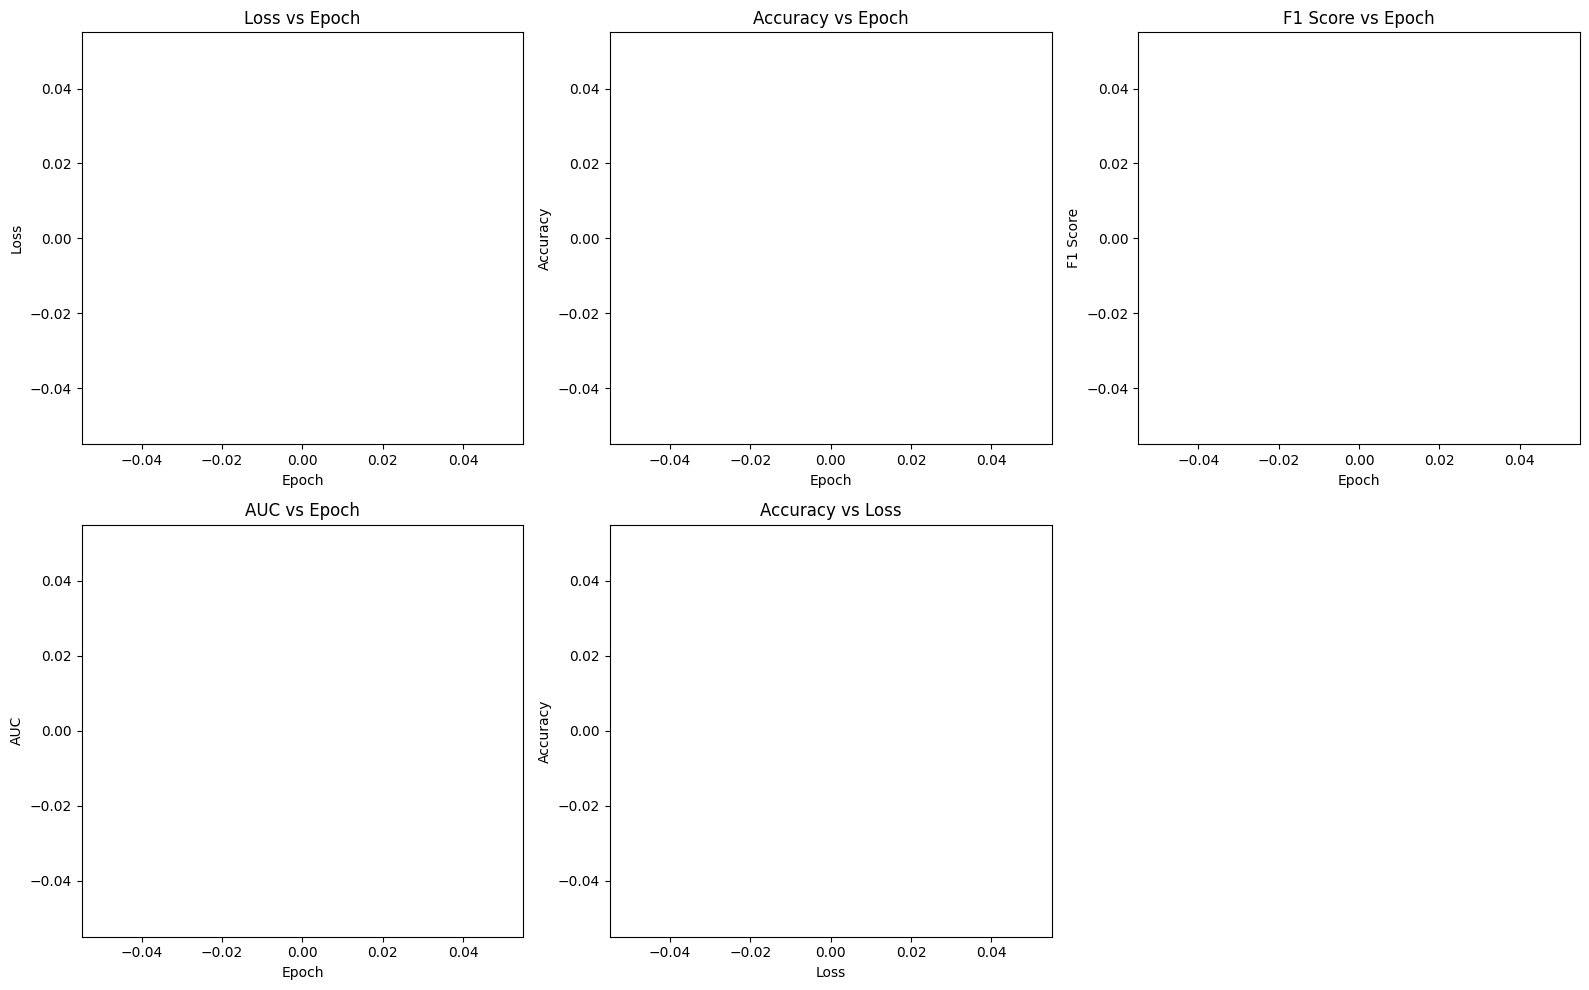

Accuracy: 0.9927
Precision: 0.9981
Recall: 0.9880
F1 Score: 0.9930
ROC AUC: 0.9996


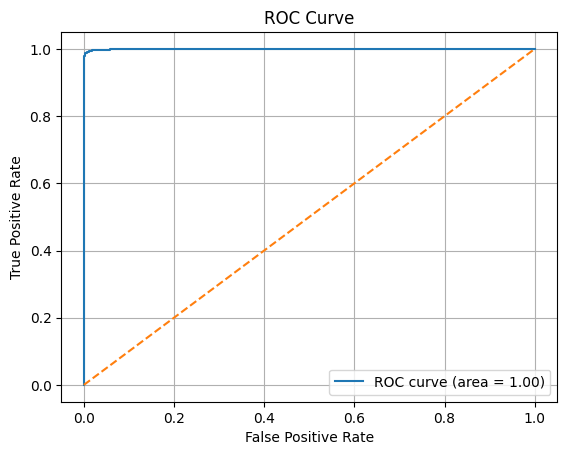

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import models, datasets, transforms
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import os
from tqdm import tqdm

# Check for GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# ------------------------------
# Ensemble Model: MobileNetV2 + EfficientNet-B0 + InceptionV3
# ------------------------------
class DeepfakeEnsemble(nn.Module):
    def __init__(self):
        super(DeepfakeEnsemble, self).__init__()
        self.mobilenet = models.mobilenet_v2(pretrained=True)
        self.mobilenet.classifier = nn.Identity()

        self.efficientnet = models.efficientnet_b0(pretrained=True)
        self.efficientnet.classifier = nn.Identity()

        self.inception = models.inception_v3(pretrained=True, aux_logits=True)
        self.inception.fc = nn.Identity()

        self.dropout = nn.Dropout(0.4)
        self.classifier = nn.Sequential(
            nn.Linear(1280 + 1280 + 2048, 256),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(256, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
      x1 = self.mobilenet(x)
      x2 = self.efficientnet(x)

      # Access the output based on the model's state
      x3 = self.inception(x).logits if self.training and self.inception.aux_logits else self.inception(x)

      x_concat = torch.cat((x1, x2, x3), dim=1)
      return self.classifier(self.dropout(x_concat))

# ------------------------------
# Data Transform
# ------------------------------
data_transform = transforms.Compose([
    transforms.Resize((299, 299)),  # For Inception
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

# Dataset & Loader
train_set = datasets.ImageFolder(root='./deepfake-detection', transform=data_transform)
train_loader = DataLoader(train_set, batch_size=16, shuffle=True)

# ------------------------------
# Initialize model, loss, optimizer
# ------------------------------
model = DeepfakeEnsemble().to(device)
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=1e-4)

# ------------------------------
# Checkpoint paths
# ------------------------------
checkpoint_path = "deepfake_ensemble_checkpoint.pth"
start_epoch = 0
num_epochs = 5

# Resume if checkpoint exists
if os.path.exists(checkpoint_path):
    checkpoint = torch.load(checkpoint_path)
    model.load_state_dict(checkpoint['model_state_dict'])
    optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
    start_epoch = checkpoint['epoch'] + 1
    print(f"Resuming from epoch {start_epoch}")

# ------------------------------
# Train function with metrics tracking
# ------------------------------
def train_model(model, loader, criterion, optimizer, start_epoch, num_epochs):
    history = {
        'epoch': [],
        'loss': [],
        'accuracy': [],
        'precision': [],
        'recall': [],
        'f1': [],
        'auc': []
    }

    for epoch in range(start_epoch, num_epochs):
        model.train()
        running_loss = 0.0
        y_true, y_pred, y_scores = [], [], []

        for inputs, labels in tqdm(loader, desc=f"Epoch {epoch+1}/{num_epochs}"):
            inputs, labels = inputs.to(device), labels.to(device).float().unsqueeze(1)

            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            preds = (outputs > 0.5).float()
            y_true.extend(labels.cpu().numpy())
            y_pred.extend(preds.cpu().numpy())
            y_scores.extend(outputs.detach().cpu().numpy())

        # Compute metrics
        epoch_loss = running_loss / len(loader)
        acc = accuracy_score(y_true, y_pred)
        prec = precision_score(y_true, y_pred)
        rec = recall_score(y_true, y_pred)
        f1 = f1_score(y_true, y_pred)
        auc = roc_auc_score(y_true, y_scores)

        print(f"Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss:.4f}, Acc: {acc:.4f}, F1: {f1:.4f}, AUC: {auc:.4f}")

        # Save metrics
        history['epoch'].append(epoch + 1)
        history['loss'].append(epoch_loss)
        history['accuracy'].append(acc)
        history['precision'].append(prec)
        history['recall'].append(rec)
        history['f1'].append(f1)
        history['auc'].append(auc)

        # Save checkpoint
        torch.save({
            'epoch': epoch,
            'model_state_dict': model.state_dict(),
            'optimizer_state_dict': optimizer.state_dict()
        }, checkpoint_path)

    return history

# ------------------------------
# Training and History Tracking
# ------------------------------
history = train_model(model, train_loader, criterion, optimizer, start_epoch, num_epochs)

# ------------------------------
# Plotting Training Metrics
# ------------------------------
def plot_training_history(history):
    epochs = history['epoch']

    plt.figure(figsize=(16, 10))

    plt.subplot(2, 3, 1)
    plt.plot(epochs, history['loss'], 'r-o')
    plt.title("Loss vs Epoch")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")

    plt.subplot(2, 3, 2)
    plt.plot(epochs, history['accuracy'], 'b-o')
    plt.title("Accuracy vs Epoch")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")

    plt.subplot(2, 3, 3)
    plt.plot(epochs, history['f1'], 'g-o')
    plt.title("F1 Score vs Epoch")
    plt.xlabel("Epoch")
    plt.ylabel("F1 Score")

    plt.subplot(2, 3, 4)
    plt.plot(epochs, history['auc'], 'm-o')
    plt.title("AUC vs Epoch")
    plt.xlabel("Epoch")
    plt.ylabel("AUC")

    plt.subplot(2, 3, 5)
    plt.plot(history['loss'], history['accuracy'], 'c-o')
    plt.title("Accuracy vs Loss")
    plt.xlabel("Loss")
    plt.ylabel("Accuracy")

    plt.tight_layout()
    plt.show()

plot_training_history(history)

# ------------------------------
# Final Evaluation
# ------------------------------
def evaluate_model(model, loader):
    model.eval()
    y_true, y_pred, y_scores = [], [], []

    with torch.no_grad():
        for inputs, labels in loader:
            inputs = inputs.to(device)
            labels = labels.to(device).float()
            outputs = model(inputs).squeeze(1)
            preds = (outputs > 0.5).float()

            y_true.extend(labels.cpu().numpy())
            y_pred.extend(preds.cpu().numpy())
            y_scores.extend(outputs.cpu().numpy())

    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred)
    rec = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    auc = roc_auc_score(y_true, y_scores)

    print(f"Accuracy: {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall: {rec:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"ROC AUC: {auc:.4f}")

    # Plot ROC Curve
    fpr, tpr, _ = roc_curve(y_true, y_scores)
    plt.figure()
    plt.plot(fpr, tpr, label=f'ROC curve (area = {auc:.2f})')
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend()
    plt.grid(True)
    plt.show()

evaluate_model(model, train_loader)


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MobileNet_V2_Weights.IMAGENET1K_V1`. You can also use `weights=MobileNet_V2_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=EfficientNet_B0_Weights.IMAGENET1K_V1`. You can also use `weights=EfficientNet_B0_Weights.DEFAULT` to get th

Resuming from epoch 5
Accuracy: 0.9927, Precision: 1.0000, Recall: 0.9869, F1 Score: 0.9934, ROC AUC: 0.9999


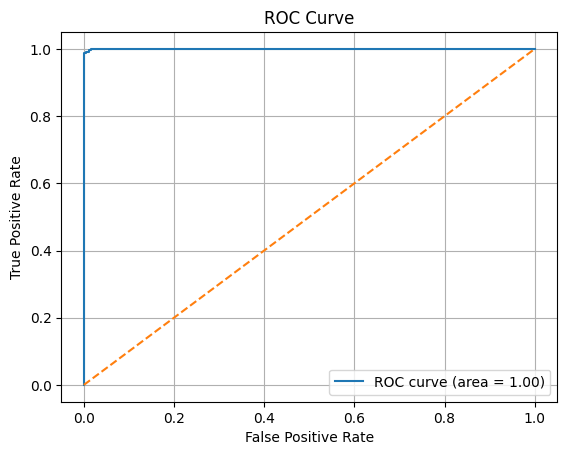

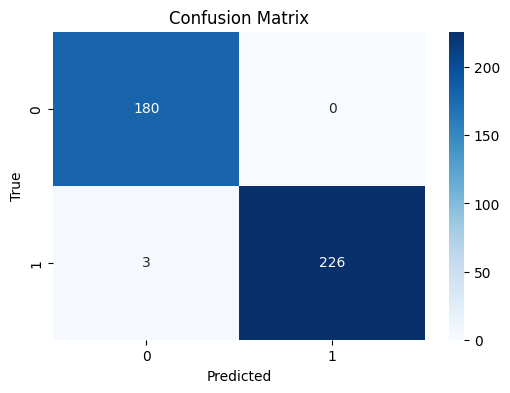

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, random_split
from torchvision import models, datasets, transforms
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import os
from tqdm import tqdm
from torch.utils.tensorboard import SummaryWriter

# Check for GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# TensorBoard Writer
writer = SummaryWriter(log_dir="runs/deepfake_experiment")

# Ensemble Model: MobileNetV2 + EfficientNet-B0 + InceptionV3
class DeepfakeEnsemble(nn.Module):
    def __init__(self):
        super(DeepfakeEnsemble, self).__init__()
        self.mobilenet = models.mobilenet_v2(pretrained=True)
        self.mobilenet.classifier = nn.Identity()

        self.efficientnet = models.efficientnet_b0(pretrained=True)
        self.efficientnet.classifier = nn.Identity()

        self.inception = models.inception_v3(pretrained=True, aux_logits=True)
        self.inception.fc = nn.Identity()

        self.dropout = nn.Dropout(0.4)
        self.classifier = nn.Sequential(
            nn.Linear(1280 + 1280 + 2048, 256),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(256, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        x1 = self.mobilenet(x)
        x2 = self.efficientnet(x)
        # Access the output based on the model's state (training or evaluation)
        x3 = self.inception(x).logits if self.training and self.inception.aux_logits else self.inception(x)
        x_concat = torch.cat((x1, x2, x3), dim=1)
        return self.classifier(self.dropout(x_concat))

# ... (rest of the code remains the same) ...
# Data Transform
data_transform = transforms.Compose([
    transforms.Resize((299, 299)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Dataset & Loader
train_set = datasets.ImageFolder(root='./deepfake-detection', transform=data_transform)
train_size = int(0.8 * len(train_set))
val_size = len(train_set) - train_size
train_subset, val_subset = random_split(train_set, [train_size, val_size])
train_loader = DataLoader(train_subset, batch_size=16, shuffle=True)
val_loader = DataLoader(val_subset, batch_size=16, shuffle=False)

# Model, Loss, Optimizer
model = DeepfakeEnsemble().to(device)
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=1e-4)

# Checkpointing
checkpoint_path = "deepfake_ensemble_checkpoint.pth"
start_epoch = 0
num_epochs = 5
if os.path.exists(checkpoint_path):
    checkpoint = torch.load(checkpoint_path)
    model.load_state_dict(checkpoint['model_state_dict'])
    optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
    start_epoch = checkpoint['epoch'] + 1
    print(f"Resuming from epoch {start_epoch}")

# Training Function
def train_model(model, train_loader, val_loader, criterion, optimizer, start_epoch, num_epochs):
    for epoch in range(start_epoch, num_epochs):
        model.train()
        running_loss = 0.0
        all_labels, all_preds, all_scores = [], [], []

        for inputs, labels in tqdm(train_loader, desc=f"Epoch {epoch+1}/{num_epochs}"):
            inputs, labels = inputs.to(device), labels.to(device).float().unsqueeze(1)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            preds = (outputs > 0.5).float()
            all_labels.extend(labels.cpu().numpy())
            all_preds.extend(preds.cpu().numpy())
            all_scores.extend(outputs.cpu().numpy())

        acc = accuracy_score(all_labels, all_preds)
        f1 = f1_score(all_labels, all_preds)
        auc = roc_auc_score(all_labels, all_scores)
        epoch_loss = running_loss / len(train_loader)

        # Validation
        model.eval()
        val_loss, val_labels, val_preds, val_scores = 0.0, [], [], []
        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs, labels = inputs.to(device), labels.to(device).float().unsqueeze(1)
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                val_loss += loss.item()
                preds = (outputs > 0.5).float()
                val_labels.extend(labels.cpu().numpy())
                val_preds.extend(preds.cpu().numpy())
                val_scores.extend(outputs.cpu().numpy())

        val_acc = accuracy_score(val_labels, val_preds)
        val_f1 = f1_score(val_labels, val_preds)
        val_auc = roc_auc_score(val_labels, val_scores)
        val_loss /= len(val_loader)

        print(f"Epoch {epoch+1}/{num_epochs}, Train Loss: {epoch_loss:.4f}, Acc: {acc:.4f}, F1: {f1:.4f}, AUC: {auc:.4f}")
        print(f"\tValidation Loss: {val_loss:.4f}, Val Acc: {val_acc:.4f}, F1: {val_f1:.4f}, AUC: {val_auc:.4f}")

        writer.add_scalar("Loss/train", epoch_loss, epoch)
        writer.add_scalar("Accuracy/train", acc, epoch)
        writer.add_scalar("F1/train", f1, epoch)
        writer.add_scalar("AUC/train", auc, epoch)
        writer.add_scalar("Loss/val", val_loss, epoch)
        writer.add_scalar("Accuracy/val", val_acc, epoch)
        writer.add_scalar("F1/val", val_f1, epoch)
        writer.add_scalar("AUC/val", val_auc, epoch)

        # Save checkpoint
        torch.save({
            'epoch': epoch,
            'model_state_dict': model.state_dict(),
            'optimizer_state_dict': optimizer.state_dict()
        }, checkpoint_path)

# Evaluation Function
def evaluate_model(model, loader):
    model.eval()
    y_true, y_pred, y_scores = [], [], []
    with torch.no_grad():
        for inputs, labels in loader:
            inputs = inputs.to(device)
            labels = labels.to(device).float()
            outputs = model(inputs).squeeze(1)
            preds = (outputs > 0.5).float()
            y_true.extend(labels.cpu().numpy())
            y_pred.extend(preds.cpu().numpy())
            y_scores.extend(outputs.cpu().numpy())

    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred)
    rec = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    auc = roc_auc_score(y_true, y_scores)
    print(f"Accuracy: {acc:.4f}, Precision: {prec:.4f}, Recall: {rec:.4f}, F1 Score: {f1:.4f}, ROC AUC: {auc:.4f}")

    fpr, tpr, _ = roc_curve(y_true, y_scores)
    plt.figure()
    plt.plot(fpr, tpr, label=f'ROC curve (area = {auc:.2f})')
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend()
    plt.grid(True)
    plt.show()

    plot_confusion_matrix(y_true, y_pred)

def plot_confusion_matrix(y_true, y_pred, title="Confusion Matrix"):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.title(title)
    plt.show()

# Run Training and Evaluation
train_model(model, train_loader, val_loader, criterion, optimizer, start_epoch, num_epochs)
evaluate_model(model, val_loader)


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import models, datasets, transforms
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import os
from tqdm import tqdm

# Check for GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# ------------------------------
# Ensemble Model: ResNet18 + EfficientNet-B0 + InceptionV3
# ------------------------------
class DeepfakeEnsemble(nn.Module):
    def __init__(self):
        super(DeepfakeEnsemble, self).__init__()

        self.resnet = models.resnet18(pretrained=True)
        self.resnet.fc = nn.Identity()

        self.efficientnet = models.efficientnet_b0(pretrained=True)
        self.efficientnet.classifier = nn.Identity()

        self.inception = models.inception_v3(pretrained=True, aux_logits=True)  # Change to aux_logits=False
        self.inception.fc = nn.Identity()

        self.dropout = nn.Dropout(0.4)
        self.classifier = nn.Sequential(
            nn.Linear(512 + 1280 + 2048, 256),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(256, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        x1 = self.resnet(x)
        x2 = self.efficientnet(x)
        x3 = self.inception(x).logits  # Now x3 will be a single tensor
        x_concat = torch.cat((x1, x2, x3), dim=1)
        return self.classifier(self.dropout(x_concat))

# ------------------------------
# Data Transform
# ------------------------------
data_transform = transforms.Compose([
    transforms.Resize((299, 299)),  # for Inception
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

# Dataset & Loader
train_set = datasets.ImageFolder(root='./deepfake-detection', transform=data_transform)
train_loader = DataLoader(train_set, batch_size=16, shuffle=True)

# ------------------------------
# Initialize model, loss, optimizer
# ------------------------------
model = DeepfakeEnsemble().to(device)
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=1e-4)

# ------------------------------
# Checkpoint paths
# ------------------------------
checkpoint_path = "deepfake_ensemble_checkpoint.pth"
start_epoch = 0
num_epochs = 5

# Resume if checkpoint exists
if os.path.exists(checkpoint_path):
    checkpoint = torch.load(checkpoint_path)
    model.load_state_dict(checkpoint['model_state_dict'])
    optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
    start_epoch = checkpoint['epoch'] + 1
    print(f"Resuming from epoch {start_epoch}")

# ------------------------------
# Train function
# ------------------------------
def train_model(model, loader, criterion, optimizer, start_epoch, num_epochs):
    for epoch in range(start_epoch, num_epochs):
        model.train()
        running_loss = 0.0

        for inputs, labels in tqdm(loader, desc=f"Epoch {epoch+1}/{num_epochs}"):
            inputs, labels = inputs.to(device), labels.to(device).float().unsqueeze(1)

            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()

        print(f"Epoch {epoch+1}/{num_epochs}, Loss: {running_loss/len(loader):.4f}")

        # Save checkpoint
        torch.save({
            'epoch': epoch,
            'model_state_dict': model.state_dict(),
            'optimizer_state_dict': optimizer.state_dict()
        }, checkpoint_path)

train_model(model, train_loader, criterion, optimizer, start_epoch, num_epochs)

# ------------------------------
# Evaluation function
# ------------------------------
def evaluate_model(model, loader):
    model.eval()
    y_true, y_pred, y_scores = [], [], []

    with torch.no_grad():
        for inputs, labels in loader:
            inputs = inputs.to(device)
            labels = labels.to(device).float()
            outputs = model(inputs).squeeze(1)
            preds = (outputs > 0.5).float()

            y_true.extend(labels.cpu().numpy())
            y_pred.extend(preds.cpu().numpy())
            y_scores.extend(outputs.cpu().numpy())

    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred)
    rec = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    auc = roc_auc_score(y_true, y_scores)

    print(f"Accuracy: {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall: {rec:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"ROC AUC: {auc:.4f}")

    # Plot ROC Curve
    fpr, tpr, _ = roc_curve(y_true, y_scores)
    plt.figure()
    plt.plot(fpr, tpr, label=f'ROC curve (area = {auc:.2f})')
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend()
    plt.grid(True)
    plt.show()

evaluate_model(model, train_loader)


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 149MB/s]
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed i

Epoch 1/5, Loss: 0.6426


Epoch 2/5: 100%|██████████| 128/128 [01:20<00:00,  1.59it/s]


Epoch 2/5, Loss: 0.4272


Epoch 3/5: 100%|██████████| 128/128 [01:20<00:00,  1.58it/s]


Epoch 3/5, Loss: 0.2063


Epoch 4/5: 100%|██████████| 128/128 [01:20<00:00,  1.59it/s]


Epoch 4/5, Loss: 0.1305


Epoch 5/5: 100%|██████████| 128/128 [01:20<00:00,  1.58it/s]


Epoch 5/5, Loss: 0.1024


AttributeError: 'Tensor' object has no attribute 'logits'

Resuming from epoch 5
Accuracy: 0.9941
Precision: 0.9908
Recall: 0.9981
F1 Score: 0.9945
ROC AUC: 0.9999


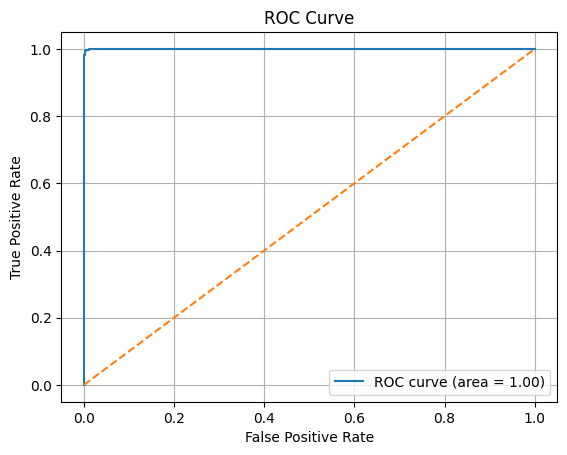

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import models, datasets, transforms
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import os
from tqdm import tqdm

# Check for GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# ------------------------------
# Ensemble Model: ResNet18 + EfficientNet-B0 + InceptionV3
# ------------------------------
class DeepfakeEnsemble(nn.Module):
    def __init__(self):
        super(DeepfakeEnsemble, self).__init__()

        self.resnet = models.resnet18(pretrained=True)
        self.resnet.fc = nn.Identity()

        self.efficientnet = models.efficientnet_b0(pretrained=True)
        self.efficientnet.classifier = nn.Identity()

        self.inception = models.inception_v3(pretrained=True, aux_logits=True)  # Change to aux_logits=False
        self.inception.fc = nn.Identity()

        self.dropout = nn.Dropout(0.4)
        self.classifier = nn.Sequential(
            nn.Linear(512 + 1280 + 2048, 256),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(256, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        x1 = self.resnet(x)
        x2 = self.efficientnet(x)
        # Access the output directly without using .logits
        x3 = self.inception(x)
        x_concat = torch.cat((x1, x2, x3), dim=1)
        return self.classifier(self.dropout(x_concat))

# ... (rest of the code remains the same) ...
# ------------------------------
# Data Transform
# ------------------------------
data_transform = transforms.Compose([
    transforms.Resize((299, 299)),  # for Inception
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

# Dataset & Loader
train_set = datasets.ImageFolder(root='./deepfake-detection', transform=data_transform)
train_loader = DataLoader(train_set, batch_size=16, shuffle=True)

# ------------------------------
# Initialize model, loss, optimizer
# ------------------------------
model = DeepfakeEnsemble().to(device)
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=1e-4)

# ------------------------------
# Checkpoint paths
# ------------------------------
checkpoint_path = "deepfake_ensemble_checkpoint.pth"
start_epoch = 0
num_epochs = 5

# Resume if checkpoint exists
if os.path.exists(checkpoint_path):
    checkpoint = torch.load(checkpoint_path)
    model.load_state_dict(checkpoint['model_state_dict'])
    optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
    start_epoch = checkpoint['epoch'] + 1
    print(f"Resuming from epoch {start_epoch}")

# ------------------------------
# Train function
# ------------------------------
def train_model(model, loader, criterion, optimizer, start_epoch, num_epochs):
    for epoch in range(start_epoch, num_epochs):
        model.train()
        running_loss = 0.0

        for inputs, labels in tqdm(loader, desc=f"Epoch {epoch+1}/{num_epochs}"):
            inputs, labels = inputs.to(device), labels.to(device).float().unsqueeze(1)

            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()

        print(f"Epoch {epoch+1}/{num_epochs}, Loss: {running_loss/len(loader):.4f}")

        # Save checkpoint
        torch.save({
            'epoch': epoch,
            'model_state_dict': model.state_dict(),
            'optimizer_state_dict': optimizer.state_dict()
        }, checkpoint_path)

train_model(model, train_loader, criterion, optimizer, start_epoch, num_epochs)

# ------------------------------
# Evaluation function
# ------------------------------
def evaluate_model(model, loader):
    model.eval()
    y_true, y_pred, y_scores = [], [], []

    with torch.no_grad():
        for inputs, labels in loader:
            inputs = inputs.to(device)
            labels = labels.to(device).float()
            outputs = model(inputs).squeeze(1)
            preds = (outputs > 0.5).float()

            y_true.extend(labels.cpu().numpy())
            y_pred.extend(preds.cpu().numpy())
            y_scores.extend(outputs.cpu().numpy())

    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred)
    rec = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    auc = roc_auc_score(y_true, y_scores)

    print(f"Accuracy: {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall: {rec:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"ROC AUC: {auc:.4f}")

    # Plot ROC Curve
    fpr, tpr, _ = roc_curve(y_true, y_scores)
    plt.figure()
    plt.plot(fpr, tpr, label=f'ROC curve (area = {auc:.2f})')
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend()
    plt.grid(True)
    plt.show()

evaluate_model(model, train_loader)


In [ ]:
# ------------------------------
# DATASET SPLIT
# ------------------------------
from torch.utils.data import random_split

# Define sizes for train/test split (e.g., 80% train, 20% test)
train_size = int(0.8 * len(train_set))
test_size = len(train_set) - train_size

# Random split
train_dataset, test_dataset = random_split(train_set, [train_size, test_size])

# Data loaders
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)

print(f"Train Samples: {len(train_dataset)}, Test Samples: {len(test_dataset)}")


Train Samples: 1632, Test Samples: 409


Accuracy: 0.9853
Precision: 0.9780
Recall: 0.9955
F1 Score: 0.9867
ROC AUC: 0.9995


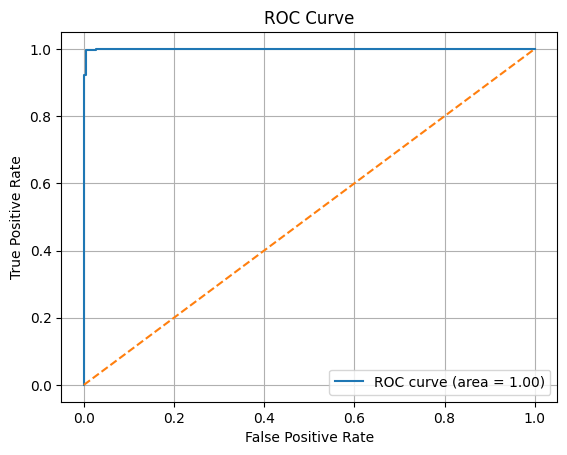

In [ ]:
train_model(model, train_loader, criterion, optimizer, start_epoch, num_epochs)

# After training, evaluate on TEST data
evaluate_model(model, test_loader)


In [ ]:
import numpy as np

def show_some_predictions(model, loader, num_samples=10):
    model.eval()
    samples_shown = 0

    with torch.no_grad():
        for inputs, labels in loader:
            inputs = inputs.to(device)
            labels = labels.to(device).float()
            outputs = model(inputs).squeeze(1)
            preds = (outputs > 0.5).float()

            for i in range(len(labels)):
                print(f"True Label: {int(labels[i].item())} | Predicted: {int(preds[i].item())} | Score: {outputs[i].item():.4f}")
                samples_shown += 1
                if samples_shown >= num_samples:
                    return

print("\nSample Predictions on Test Set:")
show_some_predictions(model, test_loader)



Sample Predictions on Test Set:
True Label: 0 | Predicted: 0 | Score: 0.0388
True Label: 0 | Predicted: 0 | Score: 0.0387
True Label: 0 | Predicted: 0 | Score: 0.0001
True Label: 0 | Predicted: 0 | Score: 0.0074
True Label: 1 | Predicted: 1 | Score: 1.0000
True Label: 0 | Predicted: 0 | Score: 0.0050
True Label: 0 | Predicted: 0 | Score: 0.0000
True Label: 1 | Predicted: 1 | Score: 1.0000
True Label: 1 | Predicted: 1 | Score: 0.9957
True Label: 0 | Predicted: 0 | Score: 0.0001


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=EfficientNet_B0_Weights.IMAGENET1K_V1`. You can also use `weights=EfficientNet_B0_Weights.DEFAULT` to get the most u

Epoch 1/5, Loss: 0.6441, Acc: 0.6286, F1: 0.6628, AUC: 0.6774


Epoch 2/5: 100%|██████████| 128/128 [01:45<00:00,  1.22it/s]


Epoch 2/5, Loss: 0.4298, Acc: 0.8070, F1: 0.8201, AUC: 0.8834


Epoch 3/5: 100%|██████████| 128/128 [01:45<00:00,  1.22it/s]


Epoch 3/5, Loss: 0.2151, Acc: 0.9226, F1: 0.9273, AUC: 0.9712


Epoch 4/5: 100%|██████████| 128/128 [01:45<00:00,  1.21it/s]


Epoch 4/5, Loss: 0.1923, Acc: 0.9265, F1: 0.9310, AUC: 0.9780


Epoch 5/5: 100%|██████████| 128/128 [01:45<00:00,  1.21it/s]


Epoch 5/5, Loss: 0.1168, Acc: 0.9510, F1: 0.9540, AUC: 0.9915


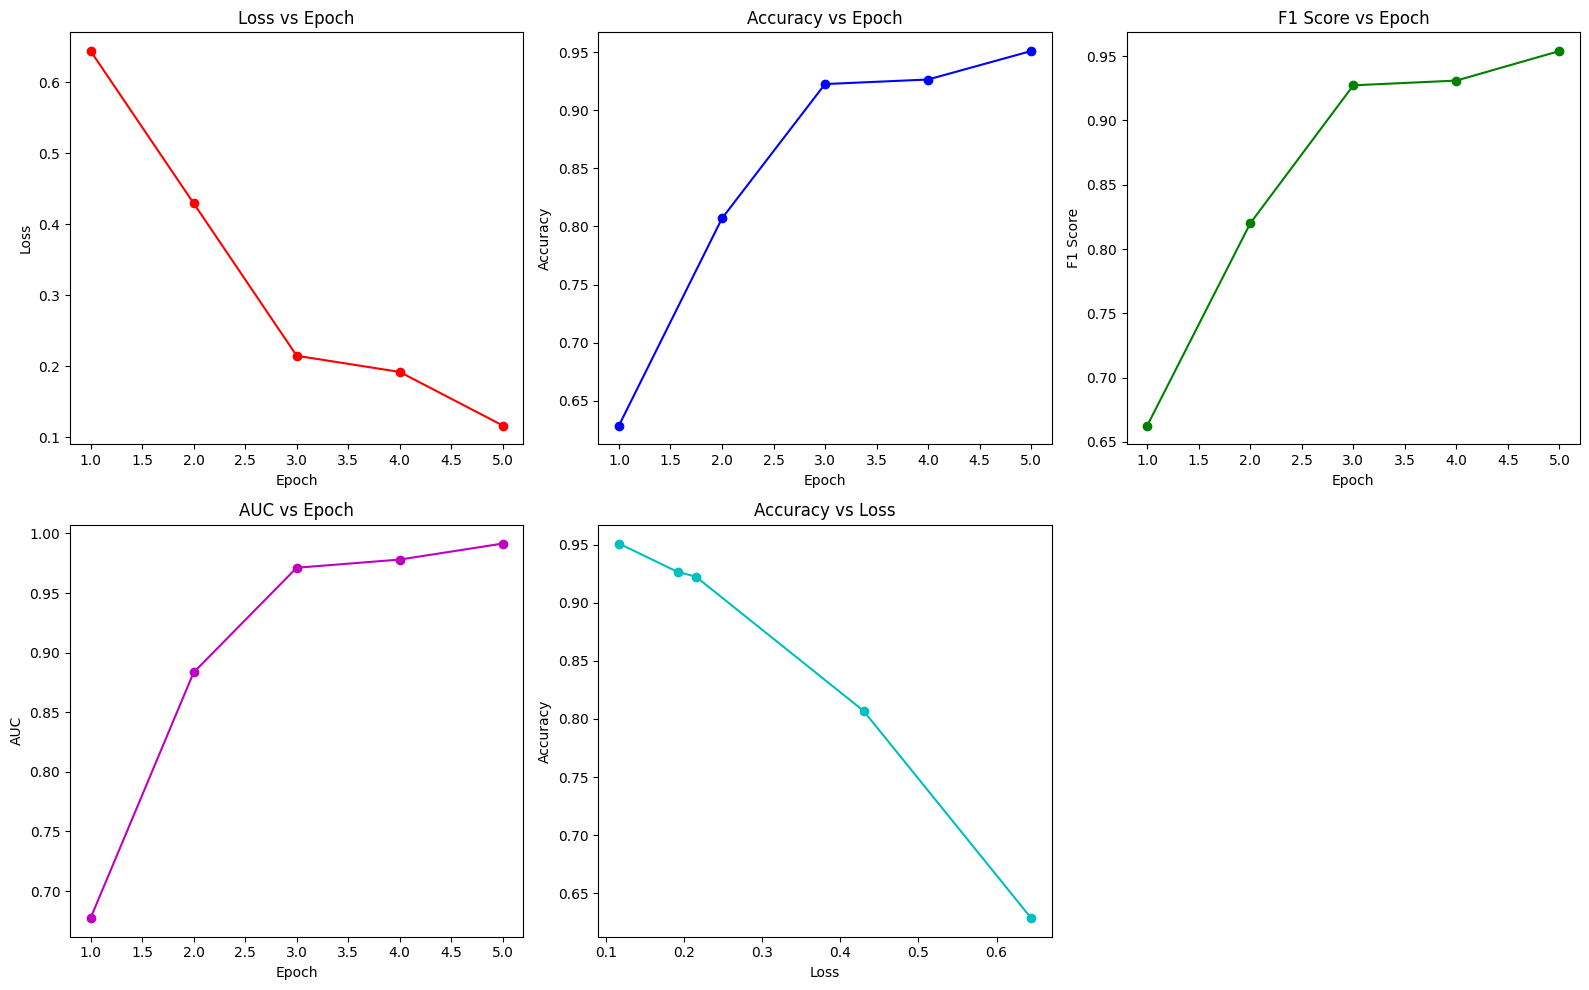

AttributeError: 'Tensor' object has no attribute 'logits'

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import models, datasets, transforms
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import os
from tqdm import tqdm

# Check for GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# ------------------------------
# Ensemble Model: ResNet50 + EfficientNet-B0 + InceptionV3
# ------------------------------
class DeepfakeEnsemble(nn.Module):
    def __init__(self):
        super(DeepfakeEnsemble, self).__init__()

        self.resnet = models.resnet50(pretrained=True)
        self.resnet.fc = nn.Identity()  # Remove classification head

        self.efficientnet = models.efficientnet_b0(pretrained=True)
        self.efficientnet.classifier = nn.Identity()

        self.inception = models.inception_v3(pretrained=True, aux_logits=True)
        self.inception.fc = nn.Identity()

        self.dropout = nn.Dropout(0.4)
        # ResNet50: 2048, EfficientNet-B0: 1280, InceptionV3: 2048
        self.classifier = nn.Sequential(
            nn.Linear(2048 + 1280 + 2048, 256),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(256, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        x1 = self.resnet(x)
        x2 = self.efficientnet(x)
        x3 = self.inception(x).logits
        x_concat = torch.cat((x1, x2, x3), dim=1)
        return self.classifier(self.dropout(x_concat))

# ------------------------------
# Data Transform
# ------------------------------
data_transform = transforms.Compose([
    transforms.Resize((299, 299)),  # Required for InceptionV3
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

# Dataset & Loader
train_set = datasets.ImageFolder(root='./deepfake-detection', transform=data_transform)
train_loader = DataLoader(train_set, batch_size=16, shuffle=True)

# ------------------------------
# Initialize model, loss, optimizer
# ------------------------------
model = DeepfakeEnsemble().to(device)
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=1e-4)

# ------------------------------
# Checkpoint paths
# ------------------------------
checkpoint_path = "new_deepfake_ensemble_checkpoint.pth"  # Change to a new file name
start_epoch = 0
num_epochs = 5

# Resume if checkpoint exists
if os.path.exists(checkpoint_path):
    checkpoint = torch.load(checkpoint_path)
    model.load_state_dict(checkpoint['model_state_dict'])
    optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
    start_epoch = checkpoint['epoch'] + 1
    print(f"Resuming from epoch {start_epoch}")

# ------------------------------
# Train function with metrics tracking
# ------------------------------
def train_model(model, loader, criterion, optimizer, start_epoch, num_epochs):
    history = {
        'epoch': [],
        'loss': [],
        'accuracy': [],
        'precision': [],
        'recall': [],
        'f1': [],
        'auc': []
    }

    for epoch in range(start_epoch, num_epochs):
        model.train()
        running_loss = 0.0
        y_true, y_pred, y_scores = [], [], []

        for inputs, labels in tqdm(loader, desc=f"Epoch {epoch+1}/{num_epochs}"):
            inputs, labels = inputs.to(device), labels.to(device).float().unsqueeze(1)

            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            preds = (outputs > 0.5).float()
            y_true.extend(labels.cpu().numpy())
            y_pred.extend(preds.cpu().numpy())
            y_scores.extend(outputs.detach().cpu().numpy())

        # Compute metrics
        epoch_loss = running_loss / len(loader)
        acc = accuracy_score(y_true, y_pred)
        prec = precision_score(y_true, y_pred)
        rec = recall_score(y_true, y_pred)
        f1 = f1_score(y_true, y_pred)
        auc = roc_auc_score(y_true, y_scores)

        print(f"Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss:.4f}, Acc: {acc:.4f}, F1: {f1:.4f}, AUC: {auc:.4f}")

        # Save metrics
        history['epoch'].append(epoch + 1)
        history['loss'].append(epoch_loss)
        history['accuracy'].append(acc)
        history['precision'].append(prec)
        history['recall'].append(rec)
        history['f1'].append(f1)
        history['auc'].append(auc)

        # Save checkpoint
        torch.save({
            'epoch': epoch,
            'model_state_dict': model.state_dict(),
            'optimizer_state_dict': optimizer.state_dict()
        }, checkpoint_path)

    return history

# ------------------------------
# Training and History Tracking
# ------------------------------
history = train_model(model, train_loader, criterion, optimizer, start_epoch, num_epochs)

# ------------------------------
# Plotting Training Metrics
# ------------------------------
def plot_training_history(history):
    epochs = history['epoch']

    plt.figure(figsize=(16, 10))

    plt.subplot(2, 3, 1)
    plt.plot(epochs, history['loss'], 'r-o')
    plt.title("Loss vs Epoch")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")

    plt.subplot(2, 3, 2)
    plt.plot(epochs, history['accuracy'], 'b-o')
    plt.title("Accuracy vs Epoch")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")

    plt.subplot(2, 3, 3)
    plt.plot(epochs, history['f1'], 'g-o')
    plt.title("F1 Score vs Epoch")
    plt.xlabel("Epoch")
    plt.ylabel("F1 Score")

    plt.subplot(2, 3, 4)
    plt.plot(epochs, history['auc'], 'm-o')
    plt.title("AUC vs Epoch")
    plt.xlabel("Epoch")
    plt.ylabel("AUC")

    plt.subplot(2, 3, 5)
    plt.plot(history['loss'], history['accuracy'], 'c-o')
    plt.title("Accuracy vs Loss")
    plt.xlabel("Loss")
    plt.ylabel("Accuracy")

    plt.tight_layout()
    plt.show()

plot_training_history(history)

# ------------------------------
# Final Evaluation
# ------------------------------
def evaluate_model(model, loader):
    model.eval()
    y_true, y_pred, y_scores = [], [], []

    with torch.no_grad():
        for inputs, labels in loader:
            inputs = inputs.to(device)
            labels = labels.to(device).float()
            outputs = model(inputs).squeeze(1)
            preds = (outputs > 0.5).float()

            y_true.extend(labels.cpu().numpy())
            y_pred.extend(preds.cpu().numpy())
            y_scores.extend(outputs.cpu().numpy())

    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred)
    rec = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    auc = roc_auc_score(y_true, y_scores)

    print(f"Accuracy: {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall: {rec:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"ROC AUC: {auc:.4f}")

    # Plot ROC Curve
    fpr, tpr, _ = roc_curve(y_true, y_scores)
    plt.figure()
    plt.plot(fpr, tpr, label=f'ROC curve (area = {auc:.2f})')
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend()
    plt.grid(True)
    plt.show()

evaluate_model(model, train_loader)


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=EfficientNet_B0_Weights.IMAGENET1K_V1`. You can also use `weights=EfficientNet_B0_Weights.DEFAULT` to get the most u

Resuming from epoch 5


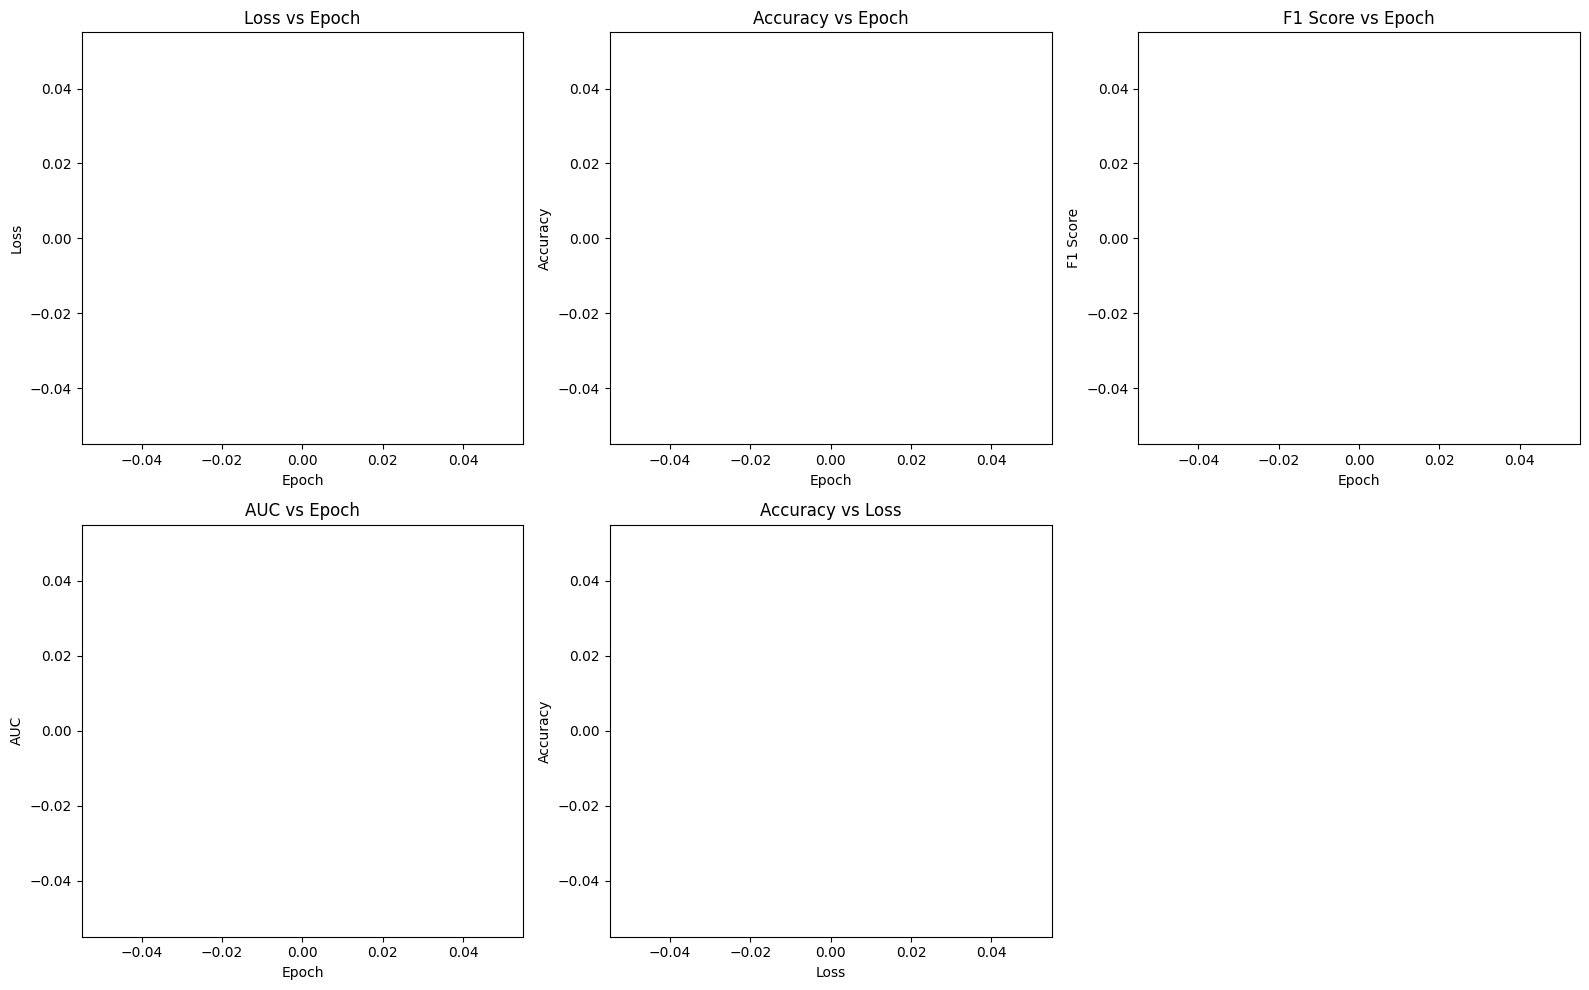

Accuracy: 0.9922
Precision: 0.9953
Recall: 0.9898
F1 Score: 0.9926
ROC AUC: 0.9997


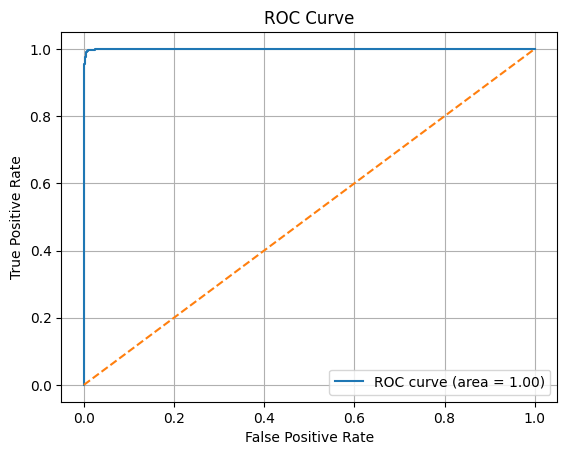

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import models, datasets, transforms
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import os
from tqdm import tqdm

# Check for GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# ------------------------------
# Ensemble Model: ResNet50 + EfficientNet-B0 + InceptionV3
# ------------------------------
class DeepfakeEnsemble(nn.Module):
    def __init__(self):
        super(DeepfakeEnsemble, self).__init__()

        self.resnet = models.resnet50(pretrained=True)
        self.resnet.fc = nn.Identity()  # Remove classification head

        self.efficientnet = models.efficientnet_b0(pretrained=True)
        self.efficientnet.classifier = nn.Identity()

        self.inception = models.inception_v3(pretrained=True, aux_logits=True)
        self.inception.fc = nn.Identity()

        self.dropout = nn.Dropout(0.4)
        # ResNet50: 2048, EfficientNet-B0: 1280, InceptionV3: 2048
        self.classifier = nn.Sequential(
            nn.Linear(2048 + 1280 + 2048, 256),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(256, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        x1 = self.resnet(x)
        x2 = self.efficientnet(x)

        # Check if training mode and aux_logits are enabled:
        if self.training and self.inception.aux_logits:
            x3 = self.inception(x).logits  # Use logits in training
        else:
            x3 = self.inception(x)       # Use direct output otherwise

        x_concat = torch.cat((x1, x2, x3), dim=1)
        return self.classifier(self.dropout(x_concat))

# ------------------------------
# Data Transform
# ------------------------------
data_transform = transforms.Compose([
    transforms.Resize((299, 299)),  # Required for InceptionV3
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

# Dataset & Loader
train_set = datasets.ImageFolder(root='./deepfake-detection', transform=data_transform)
train_loader = DataLoader(train_set, batch_size=16, shuffle=True)

# ------------------------------
# Initialize model, loss, optimizer
# ------------------------------
model = DeepfakeEnsemble().to(device)
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=1e-4)

# ------------------------------
# Checkpoint paths
# ------------------------------
checkpoint_path = "new_deepfake_ensemble_checkpoint.pth"  # Change to a new file name
start_epoch = 0
num_epochs = 5

# Resume if checkpoint exists
if os.path.exists(checkpoint_path):
    checkpoint = torch.load(checkpoint_path)
    model.load_state_dict(checkpoint['model_state_dict'])
    optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
    start_epoch = checkpoint['epoch'] + 1
    print(f"Resuming from epoch {start_epoch}")

# ------------------------------
# Train function with metrics tracking
# ------------------------------
def train_model(model, loader, criterion, optimizer, start_epoch, num_epochs):
    history = {
        'epoch': [],
        'loss': [],
        'accuracy': [],
        'precision': [],
        'recall': [],
        'f1': [],
        'auc': []
    }

    for epoch in range(start_epoch, num_epochs):
        model.train()
        running_loss = 0.0
        y_true, y_pred, y_scores = [], [], []

        for inputs, labels in tqdm(loader, desc=f"Epoch {epoch+1}/{num_epochs}"):
            inputs, labels = inputs.to(device), labels.to(device).float().unsqueeze(1)

            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            preds = (outputs > 0.5).float()
            y_true.extend(labels.cpu().numpy())
            y_pred.extend(preds.cpu().numpy())
            y_scores.extend(outputs.detach().cpu().numpy())

        # Compute metrics
        epoch_loss = running_loss / len(loader)
        acc = accuracy_score(y_true, y_pred)
        prec = precision_score(y_true, y_pred)
        rec = recall_score(y_true, y_pred)
        f1 = f1_score(y_true, y_pred)
        auc = roc_auc_score(y_true, y_scores)

        print(f"Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss:.4f}, Acc: {acc:.4f}, F1: {f1:.4f}, AUC: {auc:.4f}")

        # Save metrics
        history['epoch'].append(epoch + 1)
        history['loss'].append(epoch_loss)
        history['accuracy'].append(acc)
        history['precision'].append(prec)
        history['recall'].append(rec)
        history['f1'].append(f1)
        history['auc'].append(auc)

        # Save checkpoint
        torch.save({
            'epoch': epoch,
            'model_state_dict': model.state_dict(),
            'optimizer_state_dict': optimizer.state_dict()
        }, checkpoint_path)

    return history

# ------------------------------
# Training and History Tracking
# ------------------------------
history = train_model(model, train_loader, criterion, optimizer, start_epoch, num_epochs)

# ------------------------------
# Plotting Training Metrics
# ------------------------------
def plot_training_history(history):
    epochs = history['epoch']

    plt.figure(figsize=(16, 10))

    plt.subplot(2, 3, 1)
    plt.plot(epochs, history['loss'], 'r-o')
    plt.title("Loss vs Epoch")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")

    plt.subplot(2, 3, 2)
    plt.plot(epochs, history['accuracy'], 'b-o')
    plt.title("Accuracy vs Epoch")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")

    plt.subplot(2, 3, 3)
    plt.plot(epochs, history['f1'], 'g-o')
    plt.title("F1 Score vs Epoch")
    plt.xlabel("Epoch")
    plt.ylabel("F1 Score")

    plt.subplot(2, 3, 4)
    plt.plot(epochs, history['auc'], 'm-o')
    plt.title("AUC vs Epoch")
    plt.xlabel("Epoch")
    plt.ylabel("AUC")

    plt.subplot(2, 3, 5)
    plt.plot(history['loss'], history['accuracy'], 'c-o')
    plt.title("Accuracy vs Loss")
    plt.xlabel("Loss")
    plt.ylabel("Accuracy")

    plt.tight_layout()
    plt.show()

plot_training_history(history)

# ------------------------------
# Final Evaluation
# ------------------------------
def evaluate_model(model, loader):
    model.eval()
    y_true, y_pred, y_scores = [], [], []

    with torch.no_grad():
        for inputs, labels in loader:
            inputs = inputs.to(device)
            labels = labels.to(device).float()
            outputs = model(inputs).squeeze(1)
            preds = (outputs > 0.5).float()

            y_true.extend(labels.cpu().numpy())
            y_pred.extend(preds.cpu().numpy())
            y_scores.extend(outputs.cpu().numpy())

    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred)
    rec = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    auc = roc_auc_score(y_true, y_scores)

    print(f"Accuracy: {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall: {rec:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"ROC AUC: {auc:.4f}")

    # Plot ROC Curve
    fpr, tpr, _ = roc_curve(y_true, y_scores)
    plt.figure()
    plt.plot(fpr, tpr, label=f'ROC curve (area = {auc:.2f})')
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend()
    plt.grid(True)
    plt.show()

evaluate_model(model, train_loader)
